## Import the requred libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor




In [2]:
#pip install xgboost

In [3]:
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)


## Loading the dataset

In [4]:
df=pd.read_csv("C:\\Users\\ritik\\Downloads\\cars_engage_2022.csv")

## Checking the shape

In [5]:
df.shape

(1276, 141)

## Basic information of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 141 entries, Unnamed: 0 to Electric_Range
dtypes: float64(6), int64(1), object(134)
memory usage: 1.4+ MB


## Checking the missing values

In [7]:
df.isnull().sum().sum()

58433

In [8]:
df.isnull().sum()

Unnamed: 0                                      0
Make                                           75
Model                                           0
Variant                                         0
Ex-Showroom_Price                               0
Displacement                                   12
Cylinders                                      66
Valves_Per_Cylinder                           102
Drivetrain                                      7
Cylinder_Configuration                         13
Emission_Norm                                  11
Engine_Location                                43
Fuel_System                                     8
Fuel_Tank_Capacity                             69
Fuel_Type                                       0
Height                                          1
Length                                          0
Width                                          12
Body_Type                                       6
Doors                                           4


## from above output thye unnamed columns is irrelavant so we delet it

In [9]:

df.drop(columns=["Unnamed: 0"],inplace=True)

## Checkimg dtypes

In [10]:
df.dtypes

Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                             object
Displacement                                  object
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                            object
Fuel_Type                                     object
Height                                        object
Length                                        object
Width                                         object
Body_Type                                     object
Doors                                        f

## missing value percentage

In [11]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,"-------",df[i].isnull().sum()*100/df.shape[0],"%")

Make ------- 5.877742946708464 %
Displacement ------- 0.9404388714733543 %
Cylinders ------- 5.172413793103448 %
Valves_Per_Cylinder ------- 7.993730407523511 %
Drivetrain ------- 0.54858934169279 %
Cylinder_Configuration ------- 1.0188087774294672 %
Emission_Norm ------- 0.8620689655172413 %
Engine_Location ------- 3.3699059561128526 %
Fuel_System ------- 0.6269592476489029 %
Fuel_Tank_Capacity ------- 5.407523510971787 %
Height ------- 0.07836990595611286 %
Width ------- 0.9404388714733543 %
Body_Type ------- 0.4702194357366771 %
Doors ------- 0.31347962382445144 %
City_Mileage ------- 43.495297805642636 %
Highway_Mileage ------- 62.69592476489028 %
ARAI_Certified_Mileage ------- 8.934169278996865 %
ARAI_Certified_Mileage_for_CNG ------- 97.88401253918495 %
Kerb_Weight ------- 28.605015673981192 %
Gears ------- 8.22884012539185 %
Ground_Clearance ------- 22.648902821316614 %
Front_Brakes ------- 1.9592476489028212 %
Rear_Brakes ------- 1.9592476489028212 %
Front_Suspension ------- 4.

## Delete those columns which has missing values greater tha 70%

In [12]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        if df[i].isnull().sum()*100/df.shape[0]>70:
            df.drop(columns=[i],inplace=True)
        

In [13]:
df.shape

(1276, 115)

## We will seggregate theb data numeric and object type colum

In [14]:
numeric=["int32","float64"]
df_numeric=df.select_dtypes(include=numeric)

In [15]:
df_numeric

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
0,2.0,2.0,5.0,4.0,NaN
1,2.0,2.0,5.0,4.0,NaN
2,2.0,2.0,4.0,4.0,NaN
3,2.0,2.0,5.0,4.0,NaN
4,2.0,2.0,5.0,4.0,NaN
...,...,...,...,...,...
1271,4.0,4.0,4.0,5.0,2.0
1272,4.0,4.0,4.0,5.0,6.0
1273,4.0,4.0,4.0,5.0,6.0
1274,4.0,4.0,4.0,5.0,2.0


In [16]:
df_numeric.isnull().sum()

Cylinders               66
Valves_Per_Cylinder    102
Doors                    4
Seating_Capacity         6
Number_of_Airbags      135
dtype: int64

## To fill the missing values with mean and median in numeric data

In [17]:
for i in df_numeric:
    if df_numeric[i].isnull().sum()>0:
        df_numeric[i]=df_numeric[i].fillna(df_numeric[i].median())

In [18]:
df_numeric.isnull().sum()

Cylinders              0
Valves_Per_Cylinder    0
Doors                  0
Seating_Capacity       0
Number_of_Airbags      0
dtype: int64

In [19]:
obj=["int32","float64"]
df_obj=df.select_dtypes(include="object")

In [20]:
df_obj.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,?23.6 km/litre,NaN,23.6 km/litre,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,?23.6 km/litre,NaN,23.6 km/litre,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2 years /75000 Kms (years/distance whichever c...,NaN,Internal,110 litres,NaN,NaN,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,NaN,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,15 litres,CNG,1652 mm,3164 mm,1750 mm,Hatchback,NaN,NaN,NaN,710 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin

In [21]:
df_obj.isnull().sum()

Make                                          75
Model                                          0
Variant                                        0
Ex-Showroom_Price                              0
Displacement                                  12
Drivetrain                                     7
Cylinder_Configuration                        13
Emission_Norm                                 11
Engine_Location                               43
Fuel_System                                    8
Fuel_Tank_Capacity                            69
Fuel_Type                                      0
Height                                         1
Length                                         0
Width                                         12
Body_Type                                      6
City_Mileage                                 555
Highway_Mileage                              800
ARAI_Certified_Mileage                       114
Kerb_Weight                                  365
Gears               

In [22]:
df_obj_list = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain', 'Emission_Norm','Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter','Fuel_Type', 'ARAI_Certified_Mileage','Front_Suspension', 'Rear_Suspension','Ground_Clearance','Boot_Space',
 'Audiosystem','Third_Row_AC_Vents', 'Ventilation_System','Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator','ABS_(Anti-lock_Braking_System)','EBD_(Electronic_Brake-force_Distribution)',
 'Gear_Shift_Reminder','Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder','USB_Compatibility',
 'EBA_(Electronic_Brake_Assist)', 'Seat_Height_Adjustment','Navigation_System', 'Second_Row_AC_Vents', 'Rear_Center_Armrest','ESP_(Electronic_Stability_Program)','Cooled_Glove_Box', 'Turbocharger',
  'Rain_Sensing_Wipers','Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control']
len(df_obj_list)






45

In [23]:
df_obj=df_obj.loc[:,df_obj_list]

In [24]:
len(df_obj.columns)

45

## To check missing vlaues

In [25]:
for i in df_obj.columns:
    print(i,"---------",df_obj[i].isnull().sum())

Make --------- 75
Model --------- 0
Variant --------- 0
Ex-Showroom_Price --------- 0
Displacement --------- 12
Drivetrain --------- 7
Emission_Norm --------- 11
Keyless_Entry --------- 274
Power --------- 0
Torque --------- 2
Odometer --------- 43
Speedometer --------- 45
Tachometer --------- 13
Tripmeter --------- 60
Fuel_Type --------- 0
ARAI_Certified_Mileage --------- 114
Front_Suspension --------- 59
Rear_Suspension --------- 46
Ground_Clearance --------- 289
Boot_Space --------- 249
Audiosystem --------- 44
Third_Row_AC_Vents --------- 366
Ventilation_System --------- 35
Auto-Dimming_Rear-View_Mirror --------- 620
Hill_Assist --------- 796
Gear_Indicator --------- 499
ABS_(Anti-lock_Braking_System) --------- 132
EBD_(Electronic_Brake-force_Distribution) --------- 201
Gear_Shift_Reminder --------- 543
Adjustable_Steering_Column --------- 191
Parking_Assistance --------- 290
Key_Off_Reminder --------- 340
USB_Compatibility --------- 267
EBA_(Electronic_Brake_Assist) --------- 690


In [26]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R'], dtype=object)

In [27]:
### maruti_ suzuki
## lan rover

In [28]:
df_obj[df_obj["Make"].isnull()][["Make","Model"]]

,Make,Model
252,NaN,Mercedes-Benz B-Class
253,NaN,Mercedes-Benz B-Class
254,NaN,Mercedes-Benz B-Class
255,NaN,Mercedes-Benz B-Class
256,NaN,Mercedes-Benz Cla-Class
257,NaN,Mercedes-Benz Cla-Class
258,NaN,Mercedes-Benz Cla-Class
303,NaN,Mercedes-Benz E-Class Cabriolet
307,NaN,Mercedes-Benz Gls
308,NaN,Mercedes-Benz Gls


In [29]:
df["Model"].unique()

array(['Nano Genx', 'Redi-Go', 'Kwid', 'Eeco', 'Alto K10', 'Go',
       'Celerio Tour', 'Santro', 'Tiago', 'Celerio X', 'Ignis', 'Triber',
       'Rio', 'Etios Liva', 'Micra Active', 'Bolt', 'Xcent Prime',
       'Dzire Tour', 'Elite I20', 'Aura', 'Polo', 'Dzire', 'Freestyle',
       'Ameo', 'Aspire', 'Platinum Etios', 'Etios Cross', 'Verito Vibe',
       'Urban Cross', 'Glanza', 'Avventura', 'Jazz', 'Compass Trailhawk',
       'Mu-X', 'Alturas G4', 'Tiguan', 'Cr-V', 'Superb Sportline', 'A3',
       'Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class', 'Kodiaq',
       'Avanti', 'Q3', 'Cooper 5 Door', 'Convertible', 'Xc40', 'Clubman',
       'A4', 'John Cooper Works', 'Xe', 'Xf', 'A3 Cabriolet', 'A6', 'X3',
       'Discovery Sport', 'S90', 'S5', 'X5', 'Mustang', 'Grand Cherokee',
       'Mercedes-Benz E-Class Cabriolet', 'M2 Competition', '718',
       'Mercedes-Benz Gls', 'Land Cruiser Prado', 'Rx 450H', 'Rs5',
       '7-Series', 'Q8', 'Mercedes-Benz S-Class', 'Levante',
       'Mercede

In [30]:
df_obj[df_obj["Model"]=="Wagon"][["Make","Model"]]

,Make,Model
1173,Maruti Suzuki R,Wagon
1174,Maruti Suzuki R,Wagon
1175,Maruti Suzuki R,Wagon
1176,Maruti Suzuki R,Wagon
1177,Maruti Suzuki R,Wagon
1178,Maruti Suzuki R,Wagon
1179,Maruti Suzuki R,Wagon
1180,Maruti Suzuki R,Wagon
1181,Maruti Suzuki R,Wagon
1182,Maruti Suzuki R,Wagon


- so from above output we can see the ambiguity in make and model columns with respect to land rover rover and maruti suzuki r and range , wagon in make and model respectively so we replace land rover rover in make with land rover and maruti suzuki r with maruti suzuki in make column and replace range with range rover and wagon with wagon r in model column




In [31]:
df_obj["Make"]=df_obj["Make"].replace("Maruti Suzuki R","Maruti Suzuki")
df_obj["Make"]=df_obj["Make"].replace("Land Rover Rover","Land Rover")

In [32]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia', 'Mitsubishi'],
      dtype=object)

In [33]:
df_obj["Model"]=df_obj["Model"].replace("Range","Range Rover")
df_obj["Model"]=df_obj["Model"].replace("Wagon","Wagon R")

In [34]:
df_obj["Model"].unique()

array(['Nano Genx', 'Redi-Go', 'Kwid', 'Eeco', 'Alto K10', 'Go',
       'Celerio Tour', 'Santro', 'Tiago', 'Celerio X', 'Ignis', 'Triber',
       'Rio', 'Etios Liva', 'Micra Active', 'Bolt', 'Xcent Prime',
       'Dzire Tour', 'Elite I20', 'Aura', 'Polo', 'Dzire', 'Freestyle',
       'Ameo', 'Aspire', 'Platinum Etios', 'Etios Cross', 'Verito Vibe',
       'Urban Cross', 'Glanza', 'Avventura', 'Jazz', 'Compass Trailhawk',
       'Mu-X', 'Alturas G4', 'Tiguan', 'Cr-V', 'Superb Sportline', 'A3',
       'Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class', 'Kodiaq',
       'Avanti', 'Q3', 'Cooper 5 Door', 'Convertible', 'Xc40', 'Clubman',
       'A4', 'John Cooper Works', 'Xe', 'Xf', 'A3 Cabriolet', 'A6', 'X3',
       'Discovery Sport', 'S90', 'S5', 'X5', 'Mustang', 'Grand Cherokee',
       'Mercedes-Benz E-Class Cabriolet', 'M2 Competition', '718',
       'Mercedes-Benz Gls', 'Land Cruiser Prado', 'Rx 450H', 'Rs5',
       '7-Series', 'Q8', 'Mercedes-Benz S-Class', 'Levante',
       'Mercede

## Make columns

In [35]:
df_obj["Make"]=df_obj["Make"].combine_first(df_obj["Model"])
df_obj["Make"]

0             Tata
1             Tata
2             Tata
3             Tata
4             Tata
           ...    
1271         Honda
1272         Honda
1273         Honda
1274         Honda
1275    Mitsubishi
Name: Make, Length: 1276, dtype: object

In [36]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes-Benz B-Class',
       'Mercedes-Benz Cla-Class', 'Dc', 'Mini', 'Volvo', 'Jaguar', 'Bmw',
       'Land Rover', 'Mercedes-Benz E-Class Cabriolet', 'Porsche',
       'Mercedes-Benz Gls', 'Lexus', 'Mercedes-Benz S-Class', 'Maserati',
       'Mercedes-Benz G-Class', 'Mercedes-Benz Maybach',
       'Mercedes-Benz S-Class Cabriolet', 'Lamborghini', 'Bentley',
       'Ferrari', 'Aston Martin', 'Rolls-Royce Ghost Series Ii',
       'Rolls-Royce Wraith', 'Rolls-Royce Cullinan',
       'Rolls-Royce Phantom Coupe', 'Bugatti', 'Bajaj', 'Icml', 'Force',
       'Mg', 'Kia', 'Mercedes-Benz E-Class',
       'Mercedes-Benz C-Class Cabriolet', 'Mercedes-Benz V-Class',
       'Mercedes-Benz E-Class All Terrain', 'Mercedes-Benz Amg-Gt',
       'Mercedes-Benz Amg Gt 4-Door Coupe', 'Rolls-Royce Dawn',
      

In [37]:
df_obj["Make"].isnull().sum().sum()

0

In [38]:
for i in df_obj["Make"]:
    if "Mercedes" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Mercedes-Benz")
    elif "Rolls" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Rolls-Royce")
    elif "Go" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Datsun")






In [39]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes-Benz', 'Dc',
       'Mini', 'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Rolls-Royce', 'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Mitsubishi'], dtype=object)

In [40]:
## Model

In [41]:
df["Model"].isnull().sum()

0

In [42]:
df_obj["Variant"].isnull().sum()

0

In [43]:
df_obj["Ex-Showroom_Price"].isnull().sum()

0

In [44]:
df_obj["Ex-Showroom_Price"].unique()

array(['Rs. 2,92,667', 'Rs. 2,36,447', 'Rs. 2,96,661', ...,
       'Rs. 14,31,000', 'Rs. 12,01,000', 'Rs. 68,62,560'], dtype=object)

In [45]:
df_obj["Ex-Showroom_Price"]=df_obj["Ex-Showroom_Price"].str.replace("Rs.","").str.replace(",","")
df_obj["Ex-Showroom_Price"].unique()

C:\Users\ritik\AppData\Local\Temp\ipykernel_19852\2584825424.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_obj["Ex-Showroom_Price"]=df_obj["Ex-Showroom_Price"].str.replace("Rs.","").str.replace(",","")


array([' 292667', ' 236447', ' 296661', ..., ' 1431000', ' 1201000',
       ' 6862560'], dtype=object)

In [46]:
df_obj.rename(columns={"Ex-Showroom_Price":"Price"},inplace=True)

In [47]:
df_obj.columns

Index(['Make', 'Model', 'Variant', 'Price', 'Displacement', 'Drivetrain',
       'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque', 'Odometer',
       'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control'],
     

In [48]:
df_obj["Displacement"].unique()

array(['624 cc', '799 cc', '999 cc', '1196 cc', '998 cc', '1198 cc',
       '1086 cc', '1199 cc', '1197 cc', '1173 cc', '1489 cc', '1248 cc',
       '1364 cc', '1193 cc', '1396 cc', '1186 cc', '1498 cc', '1194 cc',
       '1496 cc', '1461 cc', '1368 cc', '1956 cc', '2999 cc', '2157 cc',
       '1968 cc', '1997 cc', '1597 cc', '1798 cc', '1395 cc', '1595 cc',
       '2143 cc', '1991 cc', '2000 cc', '1998 cc', '1969 cc', '1999 cc',
       '1984 cc', '1995 cc', '2995 cc', '2993 cc', '2998 cc', '4951 cc',
       '2987 cc', '6417 cc', '3604 cc', '2996 cc', '2979 cc', '1988 cc',
       '5461 cc', '2982 cc', '3456 cc', '2894 cc', '6592 cc', '3982 cc',
       '2925 cc', '4691 cc', '5980 cc', '4663 cc', '3996 cc', '4461 cc',
       '5204 cc', '5998 cc', '3855 cc', '5950 cc', '5198 cc', '4497 cc',
       '6593 cc', '6752 cc', '6750 cc', '6749 cc', '7993 cc', '216 cc',
       '796 cc', '1120 cc', '1497 cc', '1994 cc', '1298 cc', '1397 cc',
       '1493 cc', '2523 cc', '1591 cc', '1582 cc', '1598 

In [49]:
df_obj["Displacement"]=df_obj["Displacement"].str.replace("cc","").str.replace(" ","")
df_obj["Displacement"]

0        624
1        624
2        624
3        624
4        624
        ... 
1271    1498
1272    1498
1273    1497
1274    1497
1275    3200
Name: Displacement, Length: 1276, dtype: object

In [50]:
df_obj["Displacement"].unique()

array(['624', '799', '999', '1196', '998', '1198', '1086', '1199', '1197',
       '1173', '1489', '1248', '1364', '1193', '1396', '1186', '1498',
       '1194', '1496', '1461', '1368', '1956', '2999', '2157', '1968',
       '1997', '1597', '1798', '1395', '1595', '2143', '1991', '2000',
       '1998', '1969', '1999', '1984', '1995', '2995', '2993', '2998',
       '4951', '2987', '6417', '3604', '2996', '2979', '1988', '5461',
       '2982', '3456', '2894', '6592', '3982', '2925', '4691', '5980',
       '4663', '3996', '4461', '5204', '5998', '3855', '5950', '5198',
       '4497', '6593', '6752', '6750', '6749', '7993', '216', '796',
       '1120', '1497', '1994', '1298', '1397', '1493', '2523', '1591',
       '1582', '1598', nan, '2498', '2596', '2149', '1462', '2179', '72',
       '2393', '2694', '2755', '1799', '2199', '3198', '2198', '2400',
       '1950', '2967', '4999', '4367', '3993', '3902', '3900', '6262',
       '6498', '6598', '1172', '2489', '1353', '1500', '1596', '2487',
 

In [51]:
df_obj.loc[687,"Displacement"]=1461


In [52]:
df_obj.loc[689,"Displacement"]=1461

In [53]:
df_obj["Displacement"].unique()

array(['624', '799', '999', '1196', '998', '1198', '1086', '1199', '1197',
       '1173', '1489', '1248', '1364', '1193', '1396', '1186', '1498',
       '1194', '1496', '1461', '1368', '1956', '2999', '2157', '1968',
       '1997', '1597', '1798', '1395', '1595', '2143', '1991', '2000',
       '1998', '1969', '1999', '1984', '1995', '2995', '2993', '2998',
       '4951', '2987', '6417', '3604', '2996', '2979', '1988', '5461',
       '2982', '3456', '2894', '6592', '3982', '2925', '4691', '5980',
       '4663', '3996', '4461', '5204', '5998', '3855', '5950', '5198',
       '4497', '6593', '6752', '6750', '6749', '7993', '216', '796',
       '1120', '1497', '1994', '1298', '1397', '1493', '2523', '1591',
       '1582', '1598', nan, '2498', '2596', '2149', '1462', '2179', 1461,
       '72', '2393', '2694', '2755', '1799', '2199', '3198', '2198',
       '2400', '1950', '2967', '4999', '4367', '3993', '3902', '3900',
       '6262', '6498', '6598', '1172', '2489', '1353', '1500', '1596',
   

In [54]:
## checking the value of all the columns
for i in df_obj.columns:
    print(i,"------",df_obj[i].mode()[0])

Make ------ Maruti Suzuki
Model ------ Nexon
Variant ------ Lxi
Price ------  999900
Displacement ------ 1197
Drivetrain ------ FWD (Front Wheel Drive)
Emission_Norm ------ BS IV
Keyless_Entry ------ Smart Key
Power ------ 83PS@6000rpm
Torque ------ 200Nm@1750rpm
Odometer ------ Digital
Speedometer ------ Analog
Tachometer ------ Analog
Tripmeter ------ Yes
Fuel_Type ------ Petrol
ARAI_Certified_Mileage ------ 23 km/litre
Front_Suspension ------ MacPherson Strut
Rear_Suspension ------ Torsion Beam
Ground_Clearance ------ 165 mm
Boot_Space ------ 350 litres
Audiosystem ------ CD Player with USB & Aux-in
Third_Row_AC_Vents ------ Not Applicable
Ventilation_System ------ Fully automatic climate control
Auto-Dimming_Rear-View_Mirror ------ Yes
Hill_Assist ------ Yes
Gear_Indicator ------ Yes
ABS_(Anti-lock_Braking_System) ------ Yes
EBD_(Electronic_Brake-force_Distribution) ------ Yes
Gear_Shift_Reminder ------ Yes
Adjustable_Steering_Column ------ Rake, Reach
Parking_Assistance ------ Rea

In [55]:
df_obj["Displacement"].isnull().sum()

12

In [56]:
for i in df_obj.columns:
    if df_obj[i].isna().sum()>0:
        if "Yes" in df_obj[i].unique():
            df_obj[i].fillna("not_defined",inplace = True)
        elif i in ["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
            df_obj[i].fillna("undefined",inplace=True)
        else:
            df_obj[i].fillna(df_obj[i].mode()[0],inplace=True)

In [57]:
for i in df_obj.columns:
    print(i,"---------",df_obj[i].unique(),"\n\n")

Make --------- ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi'] 


Model --------- ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Cabriolet' '

In [58]:
## power,torque,Ari certificate milege,boot space, ground clearnc these column convert into numeric

In [59]:
df_obj["Power"]=df_obj["Power"].apply(lambda x:x[0:4])

In [60]:
df_obj["Power"].unique()

array(['38PS', '54PS', '68PS', '73PS', '74PS', '62PS', '59PS', '78PS',
       '59bh', '69PS', '86PS', '83PS', '72PS', '76.6', '64PS', '80PS',
       '75PS', '90PS', '81.8', '70bh', '71PS', '69bh', '84PS', '100P',
       '76PS', '105P', '110P', '84.3', '96PS', '65PS', '93PS', '140p',
       '89PS', '82PS', '89 b', '173P', '177P', '178b', '178B', '141P',
       '154P', '120P', '180P', '143P', '150P', '122P', '136P', '183P',
       '148b', '250P', '148h', '116P', '192P', '190b', '190P', '231h',
       '247P', '180p', '148 ', '245P', '248 ', '179P', '333P', '265H',
       '340H', '401P', '240P', '468 ', '286P', '334P', '410h', '300P',
       '258P', '557P', '262P', '450P', '265P', '340P', '609P', '275P',
       '350P', '430P', '585h', '289P', '460P', '299P', '630P', '453P',
       '550P', '261P', '455P', '610P', '650P', '590P', '560P', '608P',
       '605P', '563P', '570 ', '625P', '512P', '563@', '1479', '1600',
       '13bh', '12bh', '48PS', '47hp', '67PS', '77PS', '101.', '82hp',
      

In [61]:
l1=[]
for i in df_obj["Power"]:
    s1=""
    for j in i:
        if j.isdigit() or j==".":
            s1=s1+j
    l1.append(s1)
df_obj["Power"]=l1    

In [62]:
df_obj["Power"].unique()

array(['38', '54', '68', '73', '74', '62', '59', '78', '69', '86', '83',
       '72', '76.6', '64', '80', '75', '90', '81.8', '70', '71', '84',
       '100', '76', '105', '110', '84.3', '96', '65', '93', '140', '89',
       '82', '173', '177', '178', '141', '154', '120', '180', '143',
       '150', '122', '136', '183', '148', '250', '116', '192', '190',
       '231', '247', '245', '248', '179', '333', '265', '340', '401',
       '240', '468', '286', '334', '410', '300', '258', '557', '262',
       '450', '609', '275', '350', '430', '585', '289', '460', '299',
       '630', '453', '550', '261', '455', '610', '650', '590', '560',
       '608', '605', '563', '570', '625', '512', '1479', '1600', '13',
       '12', '48', '47', '67', '77', '101.', '117', '118', '114', '63',
       '63.9', '123', '106', '85', '128', '109', '115', '25.8', '41.5',
       '119', '104', '121', '155', '41', '156', '166', '164', '174',
       '162', '163', '88.4', '142.', '200', '160', '187', '372', '181',
       '

In [63]:
df_obj["Torque"].unique()

array(['51Nm@4000rpm', '72Nm@4386rpm', '91Nm@4250RPM', '101Nm@3000rpm',
       '85Nm@3000rpm', '90Nm@3500rpm', '78Nm@3500rpm', '104Nm@4000rpm',
       '99.04nm@4500RPM', '10.1kgm@4500RPM', '8.3KGM@4500rpm',
       '114NM@3300rpm', '113Nm@4200RPM', '96Nm@3500rpm',
       '103.9Nm@3500-4250rpm', '152Nm@2500RPM', '152Nm@2250RPM',
       '183Nm@1800-2400rpm', '104Nm@3100rpm', '170Nm@1800-2400rpm',
       '190Nm@1750-3000rpm', '140Nm@1500-4000rpm', '114Nm@6000rpm',
       '190Nm@2000rpm', '115Nm@4000rpm', '220Nm@1500rpm', '114Nm@4000rpm',
       '220Nm@1500-2750rpm', '95Nm@4000rpm', '172Nm@1500-4000rpm',
       '190NM@1750-2250RPM', '95Nm@3000-4300rpm', '230Nm@1500-2500rpm',
       '175Nm@1500-4100rpm', '250Nm@1500-2500rpm', '215Nm@1750-3000RPM',
       '120Nm@4250rpm', '132Nm@3000rpm', '160Nm@2000rpm', '209Nm@2000rpm',
       '210Nm@2000-4000RPM', '113Nm@4400 rpm', '113Nm@4200 rpm',
       '110Nm@4800rpm', '200Nm@1750rpm', '110 Nm@4800rpm',
       '350Nm@1750-2500rpm', '380Nm@1800-2800rpm'

In [64]:
df_obj["Torque"]=df_obj["Torque"].apply(lambda x:x[0:4])

In [65]:
df_obj["Torque"].unique()

array(['51Nm', '72Nm', '91Nm', '101N', '85Nm', '90Nm', '78Nm', '104N',
       '99.0', '10.1', '8.3K', '114N', '113N', '96Nm', '103.', '152N',
       '183N', '170N', '190N', '140N', '115N', '220N', '95Nm', '172N',
       '230N', '175N', '250N', '215N', '120N', '132N', '160N', '209N',
       '210N', '110N', '200N', '110 ', '350N', '380N', '420N', '340N',
       '189N', '300N', '320N', '270N', '280N', '400N', '320 ', '365N',
       '430N', '250 ', '370N', '350 ', '500N', '620N', '450N', '515N',
       '570N', '624 ', '347N', '480N', '550N', '619N', '760N', '410N',
       '335N', '600N', '850N', '900N', '580N', '520N', '1000', '700N',
       '770N', '650N', '560N', '720N', '755N', '540N', '780N', '780 ',
       '800N', '1020', '850 ', '1600', '1479', '18.9', '16.1', '69Nm',
       '16.3', '240N', '103N', '112.', '1712', '22.4', '260N', '207N',
       '195N', 'unde', '150N', '205N', '142N', '245N', '151N', '155N',
       '133N', '153N', '70Nm', '105N', '145N', '247N', '321 ', '138N',
      

In [66]:
l1=[]
for i in df_obj["Torque"]:
    s1=""
    if i=="unde":
        s1="unde"
    for j in i:
        if j.isdigit() or j==".":
            s1=s1+j
    l1.append(s1)
df_obj["Torque"]=l1    

In [67]:
df_obj["Torque"].unique()

array(['51', '72', '91', '101', '85', '90', '78', '104', '99.0', '10.1',
       '8.3', '114', '113', '96', '103.', '152', '183', '170', '190',
       '140', '115', '220', '95', '172', '230', '175', '250', '215',
       '120', '132', '160', '209', '210', '110', '200', '350', '380',
       '420', '340', '189', '300', '320', '270', '280', '400', '365',
       '430', '370', '500', '620', '450', '515', '570', '624', '347',
       '480', '550', '619', '760', '410', '335', '600', '850', '900',
       '580', '520', '1000', '700', '770', '650', '560', '720', '755',
       '540', '780', '800', '1020', '1600', '1479', '18.9', '16.1', '69',
       '16.3', '240', '103', '112.', '1712', '22.4', '260', '207', '195',
       'unde', '150', '205', '142', '245', '151', '155', '133', '153',
       '70', '105', '145', '247', '321', '138', '330', '360', '343',
       '173', '174', '353', '440', '470', '385', '640', '625', '740',
       '689', '510', '630', '697', '690', '59', '197', '134', '130',
       '18

In [68]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6 km/litre', 'undefined', '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23 km/litre', '23.01 km/litre', '24.04 km/litre',
       '15 km/litre', '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27

In [69]:
df_obj[df_obj["ARAI_Certified_Mileage"]=="1449 km/litre"]

,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1036,Mercedes-Benz,Mercedes-Benz C-Class,C 43 Amg,7500000,3982,RWD (Rear Wheel Drive),BS 6,Smart Key,503,700,Digital,Analog,Analog,Yes,Petrol,1449 km/litre,AGILITY CONTROL suspension with selective damp...,AGILITY CONTROL suspension with selective damp...,112 mm,435 litres,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [70]:
df_obj.loc[1036,"ARAI_Certified_Mileage"]="14.49 km/litre"

In [71]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6 km/litre', 'undefined', '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23 km/litre', '23.01 km/litre', '24.04 km/litre',
       '15 km/litre', '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27

In [72]:
df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].str.replace("km/litre","")
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6 ', 'undefined', '21.9 ', '25.17 ', '22.5 ', '23 ', '23.01 ',
       '24.04 ', '15 ', '24.07 ', '20.1 ', '23.1 ', '20.3 ', '24 ',
       '20.89 ', '20.5 ', '16 ', '23.7 ', '18.16 ', '23.59 ', '18.97 ',
       '19.49 ', '22.95 ', '17.57 ', '15.7 ', '20.14 ', '20 ', '28.4 ',
       '22 ', '18.6 ', '22.54 ', '18.15 ', '25.35 ', '20.4 ', '25.4 ',
       '18.78 ', '17.21 ', '19.91 ', '24.4 ', '19 ', '21.66 ', '21.73 ',
       '26.1 ', '19.4 ', '16.78 ', '17.71 ', '20.08 ', '17.1 ', '23.87 ',
       '21.01 ', '19.56 ', '18.2 ', '27.3 ', '16.3 ', '13.8 ', '12.35 ',
       '12.05 ', '17.06 ', '14.4 ', '19.5 ', '18.3 ', '13.7 ', '18.19 ',
       '20.38 ', '19.2 ', '14.81 ', '15.04 ', '17.9 ', '10 ', '15.73 ',
       '16.9 ', '21.15 ', '14.59 ', '16.47 ', '11 ', '13.12 ', '19.33 ',
       '14.11 ', '18.56 ', '13.57 ', '13.38 ', '11.24 ', '13 ', '12.8 ',
       '8.61 ', '9.8-10.0 ', '7.4 ', '11.6 ', '12 ', '11.13 ', '18 ',
       '10.8 ', '17.66 ', '11.86 ', '7.96 ', '13.5 ', '7.8 ', 

In [73]:
df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].str.replace("-21.9","").str.replace("kmpl","")
df_obj["ARAI_Certified_Mileage"].unique()

C:\Users\ritik\AppData\Local\Temp\ipykernel_19852\1585852791.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].str.replace("-21.9","").str.replace("kmpl","")


array(['23.6 ', 'undefined', '21.9 ', '25.17 ', '22.5 ', '23 ', '23.01 ',
       '24.04 ', '15 ', '24.07 ', '20.1 ', '23.1 ', '20.3 ', '24 ',
       '20.89 ', '20.5 ', '16 ', '23.7 ', '18.16 ', '23.59 ', '18.97 ',
       '19.49 ', '22.95 ', '17.57 ', '15.7 ', '20.14 ', '20 ', '28.4 ',
       '22 ', '18.6 ', '22.54 ', '18.15 ', '25.35 ', '20.4 ', '25.4 ',
       '18.78 ', '17.21 ', '19.91 ', '24.4 ', '19 ', '21.66 ', '21.73 ',
       '26.1 ', '19.4 ', '16.78 ', '17.71 ', '20.08 ', '17.1 ', '23.87 ',
       '21.01 ', '19.56 ', '18.2 ', '27.3 ', '16.3 ', '13.8 ', '12.35 ',
       '12.05 ', '17.06 ', '14.4 ', '19.5 ', '18.3 ', '13.7 ', '18.19 ',
       '20.38 ', '19.2 ', '14.81 ', '15.04 ', '17.9 ', '10 ', '15.73 ',
       '16.9 ', '21.15 ', '14.59 ', '16.47 ', '11 ', '13.12 ', '19.33 ',
       '14.11 ', '18.56 ', '13.57 ', '13.38 ', '11.24 ', '13 ', '12.8 ',
       '8.61 ', '9.8-10.0 ', '7.4 ', '11.6 ', '12 ', '11.13 ', '18 ',
       '10.8 ', '17.66 ', '11.86 ', '7.96 ', '13.5 ', '7.8 ', 

In [74]:
df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].str.replace("-10.","")
df_obj["ARAI_Certified_Mileage"].unique()

C:\Users\ritik\AppData\Local\Temp\ipykernel_19852\1289332036.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].str.replace("-10.","")


array(['23.6 ', 'undefined', '21.9 ', '25.17 ', '22.5 ', '23 ', '23.01 ',
       '24.04 ', '15 ', '24.07 ', '20.1 ', '23.1 ', '20.3 ', '24 ',
       '20.89 ', '20.5 ', '16 ', '23.7 ', '18.16 ', '23.59 ', '18.97 ',
       '19.49 ', '22.95 ', '17.57 ', '15.7 ', '20.14 ', '20 ', '28.4 ',
       '22 ', '18.6 ', '22.54 ', '18.15 ', '25.35 ', '20.4 ', '25.4 ',
       '18.78 ', '17.21 ', '19.91 ', '24.4 ', '19 ', '21.66 ', '21.73 ',
       '26.1 ', '19.4 ', '16.78 ', '17.71 ', '20.08 ', '17.1 ', '23.87 ',
       '21.01 ', '19.56 ', '18.2 ', '27.3 ', '16.3 ', '13.8 ', '12.35 ',
       '12.05 ', '17.06 ', '14.4 ', '19.5 ', '18.3 ', '13.7 ', '18.19 ',
       '20.38 ', '19.2 ', '14.81 ', '15.04 ', '17.9 ', '10 ', '15.73 ',
       '16.9 ', '21.15 ', '14.59 ', '16.47 ', '11 ', '13.12 ', '19.33 ',
       '14.11 ', '18.56 ', '13.57 ', '13.38 ', '11.24 ', '13 ', '12.8 ',
       '8.61 ', '9.80 ', '7.4 ', '11.6 ', '12 ', '11.13 ', '18 ', '10.8 ',
       '17.66 ', '11.86 ', '7.96 ', '13.5 ', '7.8 ', '14 

In [75]:
df_obj["Boot_Space"].unique()

array(['110 litres', '94 litres', '222 litres', '300 litres',
       '400 litres', '250 litres', '177 litres', '265 litres',
       '235 litres', 'undefined', '242 litres', '240 litres',
       '260 litres', '625 litres', '454 litres', '251 litres',
       '210 litres', '407 litres', '320 litres', '316 litres',
       '285 litres', '280 litres', '378 litres', '257 litres',
       '330 litres', '592 litres', '339 litres', '354 litres',
       '438 litres', '615 litres', '522 litres', '150 litres',
       '425 litres', '488 litres', '470 litres', '460 litres',
       '278 litres', '215 litres', '432 litres', '360 litres',
       '480 litres', '455 litres', '505 litres', '520 litres',
       '560 litres', '550 litres', '650 litres', '1025 litres',
       '540 litres', '465 litres', '515 litres', '500 litres',
       '605 litres', '530 litres', '510 litres', '580 litres',
       '261 litres', '133 litres', '616 litres', '358 litres',
       '430 litres', '230 litres', '490 litres', '443 li

In [76]:
df_obj["Boot_Space"]=df_obj["Boot_Space"].apply(lambda x:x[0:4])

In [77]:
df_obj["Boot_Space"].unique()

array(['110 ', '94 l', '222 ', '300 ', '400 ', '250 ', '177 ', '265 ',
       '235 ', 'unde', '242 ', '240 ', '260 ', '625 ', '454 ', '251 ',
       '210 ', '407 ', '320 ', '316 ', '285 ', '280 ', '378 ', '257 ',
       '330 ', '592 ', '339 ', '354 ', '438 ', '615 ', '522 ', '150 ',
       '425 ', '488 ', '470 ', '460 ', '278 ', '215 ', '432 ', '360 ',
       '480 ', '455 ', '505 ', '520 ', '560 ', '550 ', '650 ', '1025',
       '540 ', '465 ', '515 ', '500 ', '605 ', '530 ', '510 ', '580 ',
       '261 ', '133 ', '616 ', '358 ', '430 ', '230 ', '490 ', '443 ',
       '395 ', '20 l', '256 ', '243 ', '268 ', '345 ', '419 ', '390 ',
       '420 ', '350 ', '1702', '328 ', '352 ', '475 ', '259 ', '207 ',
       '759 ', '494 ', '135 ', '255 ', '223 ', '600 ', '209 ', '384 ',
       '96 l', '128 ', '448 ', '324 ', '296 ', '211 ', '270 ', '380 ',
       '495 ', '1400', '281 ', '295 ', '909 ', '1761', '478 ', '645 ',
       '745 ', '770 ', '621 ', '535 ', '173 ', '165 ', '70 l', '450 ',
      

In [78]:
df_obj["Boot_Space"]=df_obj["Boot_Space"].str.replace(" l","").str.replace("(","")
df_obj["Boot_Space"].unique()

C:\Users\ritik\AppData\Local\Temp\ipykernel_19852\3050783360.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_obj["Boot_Space"]=df_obj["Boot_Space"].str.replace(" l","").str.replace("(","")


array(['110 ', '94', '222 ', '300 ', '400 ', '250 ', '177 ', '265 ',
       '235 ', 'unde', '242 ', '240 ', '260 ', '625 ', '454 ', '251 ',
       '210 ', '407 ', '320 ', '316 ', '285 ', '280 ', '378 ', '257 ',
       '330 ', '592 ', '339 ', '354 ', '438 ', '615 ', '522 ', '150 ',
       '425 ', '488 ', '470 ', '460 ', '278 ', '215 ', '432 ', '360 ',
       '480 ', '455 ', '505 ', '520 ', '560 ', '550 ', '650 ', '1025',
       '540 ', '465 ', '515 ', '500 ', '605 ', '530 ', '510 ', '580 ',
       '261 ', '133 ', '616 ', '358 ', '430 ', '230 ', '490 ', '443 ',
       '395 ', '20', '256 ', '243 ', '268 ', '345 ', '419 ', '390 ',
       '420 ', '350 ', '1702', '328 ', '352 ', '475 ', '259 ', '207 ',
       '759 ', '494 ', '135 ', '255 ', '223 ', '600 ', '209 ', '384 ',
       '96', '128 ', '448 ', '324 ', '296 ', '211 ', '270 ', '380 ',
       '495 ', '1400', '281 ', '295 ', '909 ', '1761', '478 ', '645 ',
       '745 ', '770 ', '621 ', '535 ', '173 ', '165 ', '70', '450 ',
       '525 ',

In [79]:
df_obj["Ground_Clearance"].unique()

array(['180 mm', '185 mm', '184 mm', '160 mm', '165 mm', 'undefined',
       '170 mm', '182 mm', '200 mm', '154 mm', '163 mm', '190 mm',
       '174 mm', '172 mm', '205 mm', '220 mm', '149 mm', '198 mm',
       '208 mm', '164 mm', '161 mm', '211 mm', '146 mm', '125 mm',
       '100 mm', '212 mm', '167 mm', '152 mm', '137 mm', '206 mm',
       '210 mm', '307 mm', '140 mm', '109 mm', '241 mm', '215 mm',
       '110 mm', '142 mm', '119 mm', '130 mm', '113 mm', '150 mm',
       '175 mm', '209 mm', '195 mm', '133 mm', '225 mm', '188 mm',
       '179 mm', '136 mm', '157 mm', '201 mm', '155 mm', '498 mm',
       '218 mm', '238 mm', '295.5 mm', '227 mm', '295 mm', '128 mm',
       '135 mm', '186 mm', '192 mm', '132 mm', '112 mm', '213 mm',
       '121 mm', '122 mm', '108 mm', '183 mm', '158 mm', '124 mm',
       '138 mm', '235 mm'], dtype=object)

In [80]:
df_obj["Ground_Clearance"]=df_obj["Ground_Clearance"].str.replace(" mm","")
df_obj["Ground_Clearance"].unique()

array(['180', '185', '184', '160', '165', 'undefined', '170', '182',
       '200', '154', '163', '190', '174', '172', '205', '220', '149',
       '198', '208', '164', '161', '211', '146', '125', '100', '212',
       '167', '152', '137', '206', '210', '307', '140', '109', '241',
       '215', '110', '142', '119', '130', '113', '150', '175', '209',
       '195', '133', '225', '188', '179', '136', '157', '201', '155',
       '498', '218', '238', '295.5', '227', '295', '128', '135', '186',
       '192', '132', '112', '213', '121', '122', '108', '183', '158',
       '124', '138', '235'], dtype=object)

In [81]:
df_obj.dtypes

Make                                         object
Model                                        object
Variant                                      object
Price                                        object
Displacement                                 object
Drivetrain                                   object
Emission_Norm                                object
Keyless_Entry                                object
Power                                        object
Torque                                       object
Odometer                                     object
Speedometer                                  object
Tachometer                                   object
Tripmeter                                    object
Fuel_Type                                    object
ARAI_Certified_Mileage                       object
Front_Suspension                             object
Rear_Suspension                              object
Ground_Clearance                             object
Boot_Space  

In [82]:
for column in ["Power","Torque","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]:
    print(column,"---------",df_obj[column].unique())

Power --------- ['38' '54' '68' '73' '74' '62' '59' '78' '69' '86' '83' '72' '76.6' '64'
 '80' '75' '90' '81.8' '70' '71' '84' '100' '76' '105' '110' '84.3' '96'
 '65' '93' '140' '89' '82' '173' '177' '178' '141' '154' '120' '180' '143'
 '150' '122' '136' '183' '148' '250' '116' '192' '190' '231' '247' '245'
 '248' '179' '333' '265' '340' '401' '240' '468' '286' '334' '410' '300'
 '258' '557' '262' '450' '609' '275' '350' '430' '585' '289' '460' '299'
 '630' '453' '550' '261' '455' '610' '650' '590' '560' '608' '605' '563'
 '570' '625' '512' '1479' '1600' '13' '12' '48' '47' '67' '77' '101.'
 '117' '118' '114' '63' '63.9' '123' '106' '85' '128' '109' '115' '25.8'
 '41.5' '119' '104' '121' '155' '41' '156' '166' '164' '174' '162' '163'
 '88.4' '142.' '200' '160' '187' '372' '181' '184' '268.' '549' '233'
 '188' '268' '197' '249' '252' '194' '225' '407' '320' '235' '567' '296'
 '335' '518' '254' '274' '302' '558' '510' '476' '639' '580' '571' '602'
 '631' '670' '681' '700' '740' '34.7' '

In [83]:
## displacment=undifined
## ground clearance=undifiend
## boot space=unde
## arai=undifiend
## torque=unde
## 

In [84]:
l=["Boot_Space","Torque"]
for i in l:
    df_obj[i]=df_obj[i].replace("unde",np.nan)

In [85]:
l=["ARAI_Certified_Mileage","Displacement","Ground_Clearance"]
for i in l:
    df_obj[i]=df_obj[i].replace("undefined",np.nan)

In [86]:
df_obj.isnull().sum()

Make                                           0
Model                                          0
Variant                                        0
Price                                          0
Displacement                                  12
Drivetrain                                     0
Emission_Norm                                  0
Keyless_Entry                                  0
Power                                          0
Torque                                         2
Odometer                                       0
Speedometer                                    0
Tachometer                                     0
Tripmeter                                      0
Fuel_Type                                      0
ARAI_Certified_Mileage                       114
Front_Suspension                               0
Rear_Suspension                                0
Ground_Clearance                             289
Boot_Space                                   249
Audiosystem         

In [87]:
for column in ["Power","Torque","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]:
    df_obj[column]=df_obj[column].astype("float64")

In [88]:
for column in ["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
    df_obj[column]=df_obj[column].fillna(df_obj[column].mean())
    

In [89]:
df_obj.dtypes

Make                                          object
Model                                         object
Variant                                       object
Price                                        float64
Displacement                                 float64
Drivetrain                                    object
Emission_Norm                                 object
Keyless_Entry                                 object
Power                                        float64
Torque                                       float64
Odometer                                      object
Speedometer                                   object
Tachometer                                    object
Tripmeter                                     object
Fuel_Type                                     object
ARAI_Certified_Mileage                       float64
Front_Suspension                              object
Rear_Suspension                               object
Ground_Clearance                             f

In [90]:
df_obj.isnull().sum().sum()

0

## joining the two dataframe df_numeric and df_obj

In [91]:
df1=pd.concat([df_numeric,df_obj],axis=1)
df1.shape

(1276, 50)

In [92]:
df1.dtypes

Cylinders                                    float64
Valves_Per_Cylinder                          float64
Doors                                        float64
Seating_Capacity                             float64
Number_of_Airbags                            float64
Make                                          object
Model                                         object
Variant                                       object
Price                                        float64
Displacement                                 float64
Drivetrain                                    object
Emission_Norm                                 object
Keyless_Entry                                 object
Power                                        float64
Torque                                       float64
Odometer                                      object
Speedometer                                   object
Tachometer                                    object
Tripmeter                                     

In [93]:
df1.head()

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
1,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
2,2.0,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,18.667728,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
3,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xta,334768.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,21.900000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,94.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
4,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xm,272223.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined


In [94]:
df1.drop(columns=["Valves_Per_Cylinder"],inplace=True)

In [95]:
df1.shape

(1276, 49)

## Data insight

In [96]:
df1["Price"].agg(["max","min","mean"]) ## e=10 ki power 8

max     2.121554e+08
min     2.364470e+05
mean    4.596538e+06
Name: Price, dtype: float64

In [97]:
## which car have the max price
df1[df1["Price"]==df1["Price"].max()]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
356,16.0,2.0,2.0,6.0,Bugatti,Chiron,Sport,212155397.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1600.0,1479.0,Digital,Digital,Digital,Yes,Petrol,5.95,Runflat,Runflat,179.608916,387.5852,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not_defined,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [98]:
## which car have the min price
df1[df1["Price"]==df1["Price"].min()]


,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.6,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined


In [99]:
## to see how many cars is greater than avg price
df_a=df1[df1["Price"]>=df1["Price"].mean()]
df_a

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
278,4.0,4.0,4.0,6.0,Jaguar,Xe,Se Diesel,4633000.0,1999.000000,RWD (Rear Wheel Drive),BS 6,Smart Key,180.0,430.000000,Digital,Analog,Analog,Yes,Diesel,11.000000,Double wishbone,Independent Integral Link,125.000000,455.0000,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
279,4.0,4.0,5.0,6.0,Jaguar,Xe,Se Petrol,4633000.0,1997.000000,RWD (Rear Wheel Drive),BS 6,Smart Key,250.0,365.000000,Digital,Analog,Analog,Yes,Petrol,11.000000,Double wishbone,Independent Integral Link,125.000000,455.0000,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
280,4.0,4.0,5.0,6.0,Jaguar,Xf,2.0 Prestige,5436329.0,1999.000000,RWD (Rear Wheel Drive),BS IV,not_defined,247.0,340.000000,Analog,Analog,Analog,Yes,Petrol,13.120000,Adaptive Dynamics system,Adaptive Dynamics system,179.608916,505.0000,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment,Yes,Yes,Cup Holders,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
281,4.0,4.0,5.0,6.0,Jaguar,Xf,2.0 Portfolio,6073446.0,1999.000000,RWD (Rear Wheel Drive),BS IV,Smart Key,247.0,340.000000,Analog,Analog,Analog,Yes,Petrol,13.120000,Adaptive Dynamics system,Adaptive Dynamics system,100.000000,520.0000,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment,Yes,Yes,Cup Holders,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
282,4.0,4.0,5.0,6.0,Jaguar,Xf,2.0 Portfolio Diesel,6138811.0,1999.000000,RWD (Rear Wheel Drive),BS IV,Smart Key,180.0,430.000000,Analog,Analog,Analog,Yes,Diesel,19.330000,Adaptive Dynamics system,Adaptive Dynamics system,100.000000,520.0000,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",not_defined,Yes,Yes,Yes,Electric Adjustment,Yes,Yes,Cup Holders,Yes,not_defined,not_defined,Yes,Yes,Yes,Yes
283,4.0,4.0,5.0,6.0,Jaguar,Xf,2.0 Prestige Diesel,5506622.0,1999.000000,RWD (Rear Wheel Drive),BS IV,not_defined,180.0,430.000000,Analog,Analog,Analog,Yes,Diesel,19.330000,Adaptive Dynamics system,Adaptive Dynamics system,179.608916,505.0000,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment,Yes,Yes,Cup Holders,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
284,4.0,4.0,5.0,6.0,Jaguar,Xf,2.0 Pure Diesel,4977080.0,1999.000000,RWD (Rear Wheel Drive),BS IV,not_defined,180.0,430.000000,Analog,Analog,Analog,Yes,Diesel,19.330000,Adaptive Dynamics system,Adaptive Dynamics system,179.608916,505.0000,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,2 Zone Climate 

In [100]:
len(df_a)

244

In [101]:
## which company car whose price is greater than avg price of car
df_a["Make"].unique()

array(['Jaguar', 'Audi', 'Bmw', 'Land Rover', 'Volvo', 'Ford', 'Jeep',
       'Mercedes-Benz', 'Porsche', 'Toyota', 'Lexus', 'Maserati',
       'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin', 'Rolls-Royce',
       'Bugatti', 'Nissan', 'Mitsubishi'], dtype=object)

In [102]:
df_a["Make"].value_counts()

Mercedes-Benz    42
Land Rover       37
Bmw              31
Audi             21
Jaguar           20
Porsche          14
Lamborghini      13
Lexus            10
Maserati          9
Volvo             9
Rolls-Royce       9
Ferrari           8
Bentley           6
Jeep              5
Aston Martin      3
Toyota            2
Bugatti           2
Ford              1
Nissan            1
Mitsubishi        1
Name: Make, dtype: int64

In [103]:
df_a[["Make","Model","Variant","Price"]]

,Make,Model,Variant,Price
278,Jaguar,Xe,Se Diesel,4633000.0
279,Jaguar,Xe,Se Petrol,4633000.0
280,Jaguar,Xf,2.0 Prestige,5436329.0
281,Jaguar,Xf,2.0 Portfolio,6073446.0
282,Jaguar,Xf,2.0 Portfolio Diesel,6138811.0
283,Jaguar,Xf,2.0 Prestige Diesel,5506622.0
284,Jaguar,Xf,2.0 Pure Diesel,4977080.0
285,Audi,A3 Cabriolet,40 Tfsi,5038000.0
286,Audi,A6,Premium Plus 45 Tfsi,5442200.0
287,Audi,A6,Technology 45 Tfsi,5942200.0


In [104]:
## to see how many car is less than avg price
df_b=df1[df1["Price"]<=df1["Price"].mean()]
df_b

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
2,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,18.667728,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
3,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xta,334768.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,21.900000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,94.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
4,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xm,272223.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [105]:
len(df_b)

1032

<AxesSubplot:xlabel='Price'>

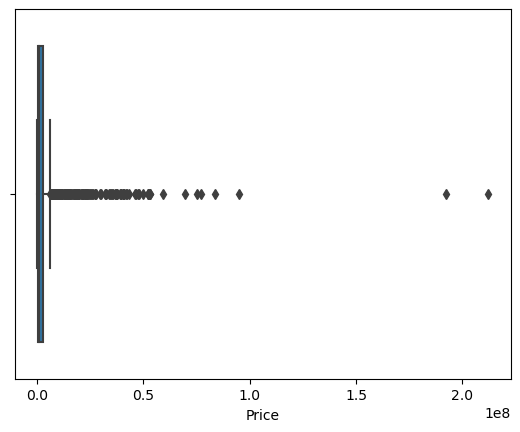

In [106]:
sns.boxplot(x="Price",data=df1)

## find out the price of the car without 2 outlier

In [107]:
x=df1[df1["Price"]<=150000000]
x

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
2,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,18.667728,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
3,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xta,334768.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,21.900000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,94.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
4,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xm,272223.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [108]:
x["Price"].mean()

4286408.171114599

## avg price of the car is around 42 lakh

## corelation with respect to price

In [109]:
df1.corr()["Price"]

Cylinders                 0.817001
Doors                    -0.460311
Seating_Capacity         -0.307150
Number_of_Airbags         0.335710
Price                     1.000000
Displacement              0.794376
Power                     0.855190
Torque                    0.702175
ARAI_Certified_Mileage   -0.207777
Ground_Clearance         -0.012123
Boot_Space                0.049544
Name: Price, dtype: float64

## Findings
- there is positive strong correlation of cylinder,diaplacement,power,torque  with price
- Number_of_Airbags,boot_space  is also positively correlated with low correlation
- while doors, seating_capacity,ARAI_Certified_Mileage,ground_clearance this is negatively correlated with price
- cylinder,diaplacement,power,torque it is important feature with respect to price

## find the realtion of numeric column with respect to price viasually

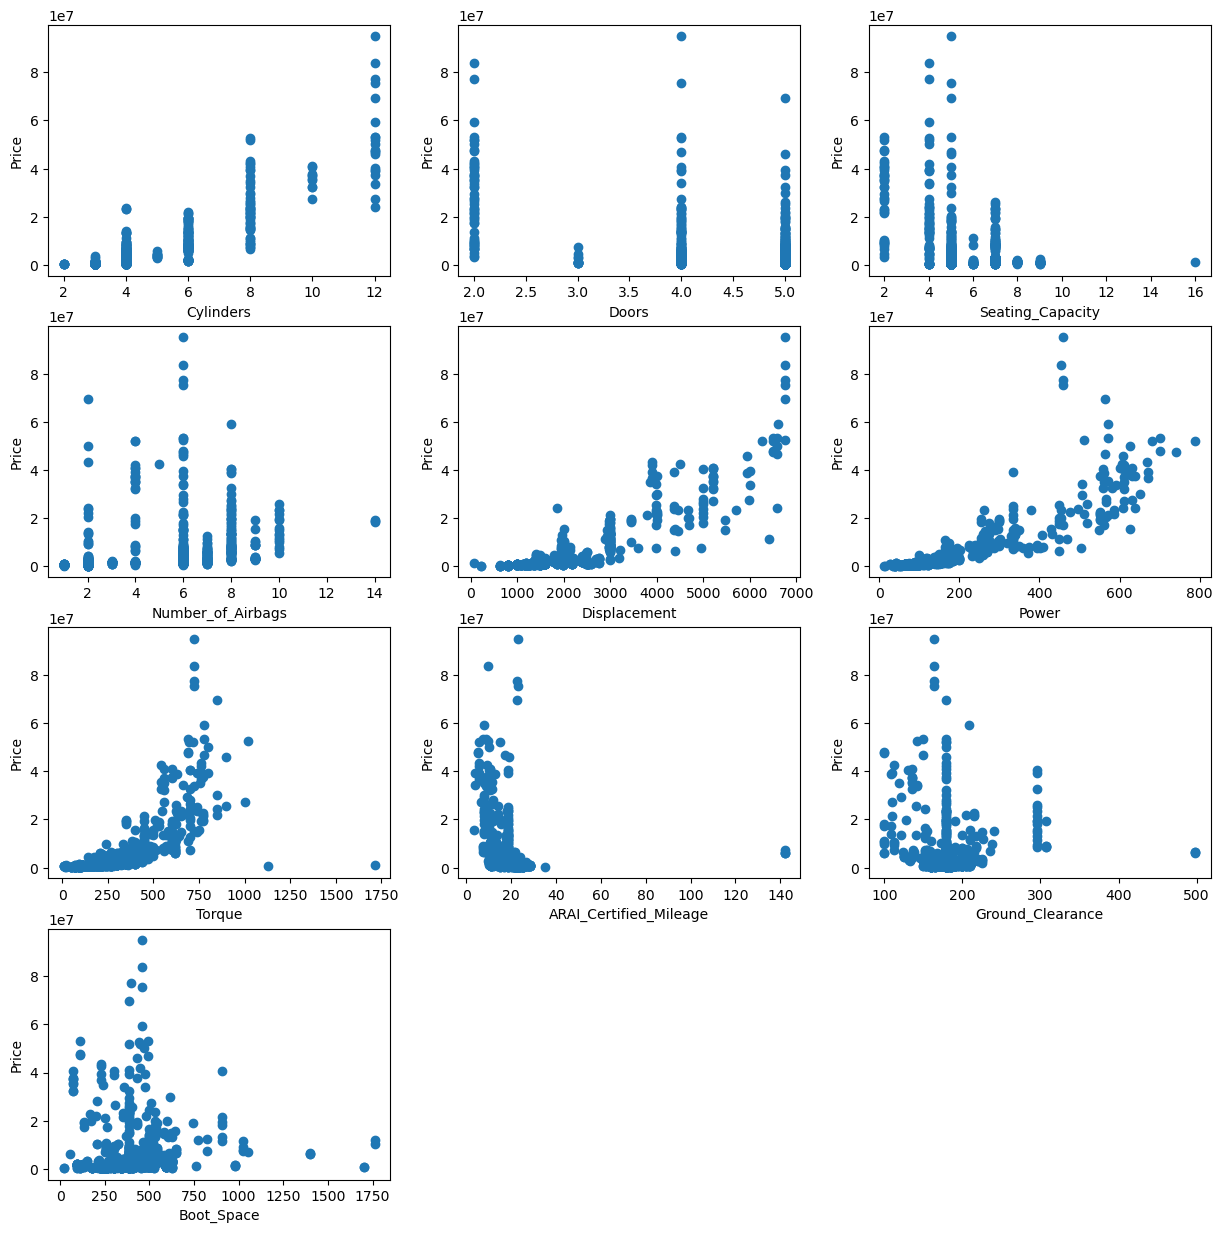

In [110]:
numeric=["int32","float64"]
n=1
plt.figure(figsize=(15,15))
for i in x.select_dtypes(include=numeric):
    if i!="Price":
        plt.subplot(4,3,n)
        plt.scatter(x[i],x["Price"])
        plt.xlabel(i)
        plt.ylabel("Price")
        n=n+1

In [111]:
x[x["Seating_Capacity"]==16]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1204,4.0,5.0,16.0,2.0,Tata,Winger,15S,1205000.0,2200.0,FWD (Front Wheel Drive),BS 6,not_defined,73.5,190.0,Analog,Analog,Analog,Yes,Diesel,18.667728,McPherson strut with coil spring,"Double parabolic leaf spring, Hydraulic telesc...",180.0,387.5852,Not on offer,Not Applicable,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Rake,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,Cup Holders,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined


In [112]:
# How many cars of each companies

In [113]:
df1["Make"].value_counts()

Maruti Suzuki    163
Hyundai          130
Mahindra         119
Tata             100
Toyota            82
Honda             64
Mercedes-Benz     57
Skoda             43
Ford              43
Land Rover        37
Bmw               37
Renault           36
Volkswagen        34
Audi              31
Nissan            29
Jeep              28
Datsun            24
Fiat              23
Jaguar            22
Kia               21
Volvo             18
Porsche           14
Mg                13
Lamborghini       13
Icml              11
Mini              10
Lexus             10
Maserati           9
Rolls-Royce        9
Ferrari            8
Mitsubishi         7
Bentley            6
Force              6
Premier            6
Isuzu              5
Aston Martin       3
Bugatti            2
Bajaj              2
Dc                 1
Name: Make, dtype: int64

C:\Users\ritik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


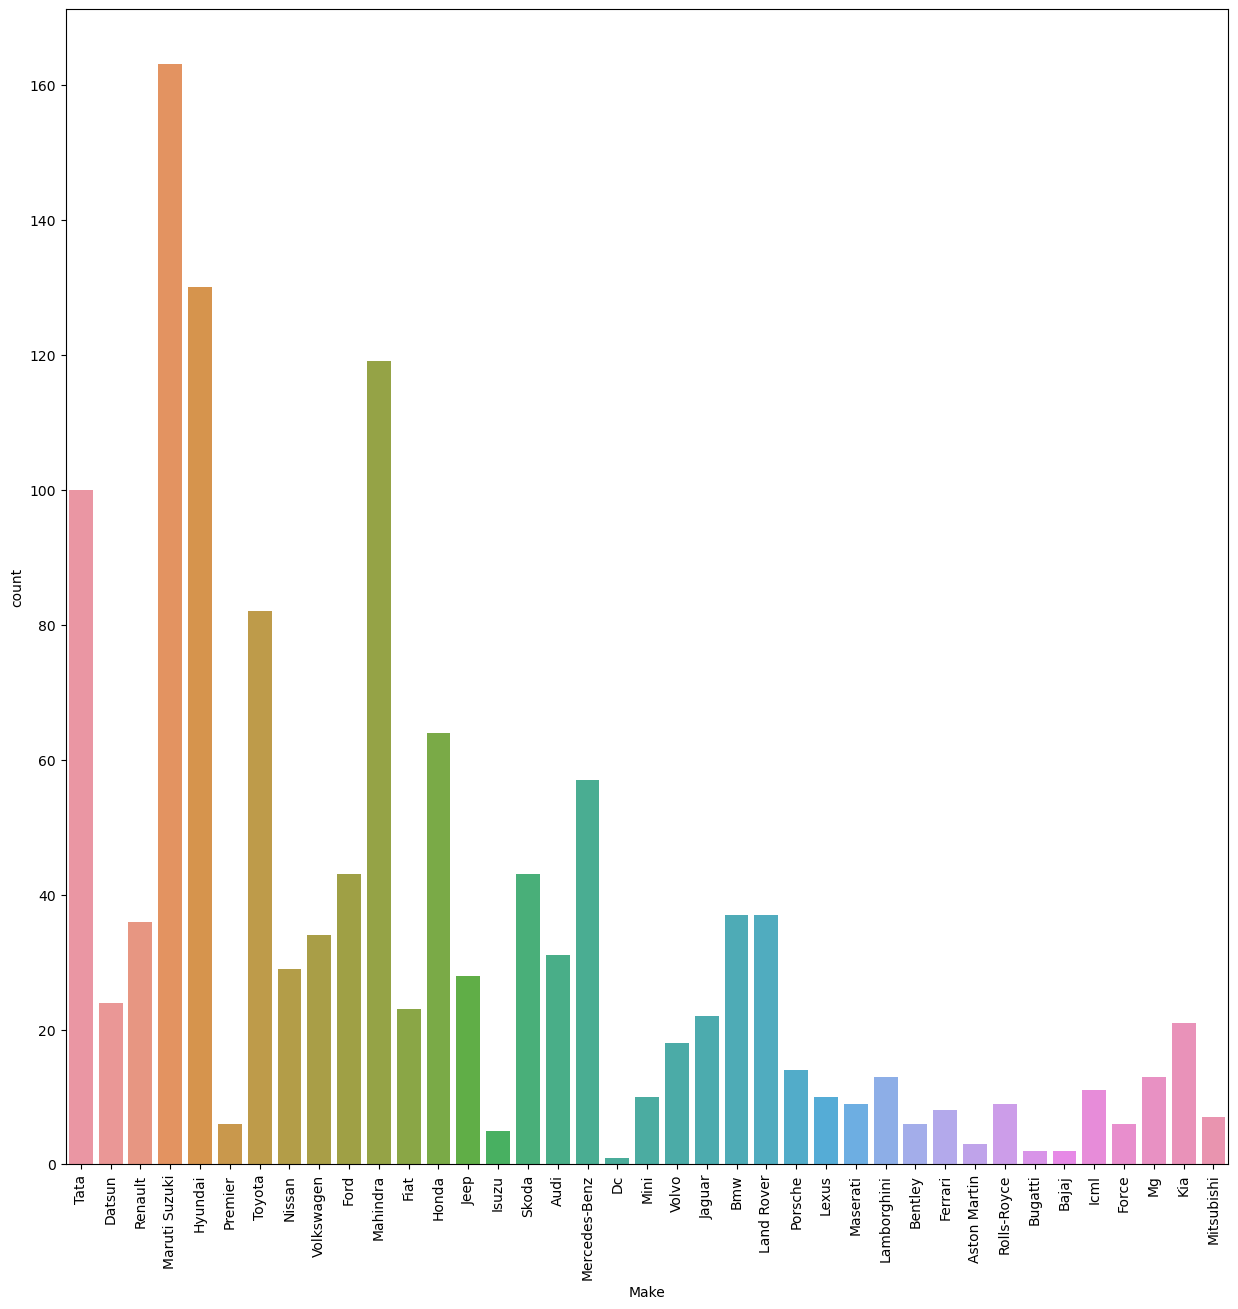

In [114]:
plt.figure(figsize=(15,15))
sns.countplot(df1["Make"])
plt.xticks(rotation=90);

## Find the min,max and average price of the cars based on thier company 

In [115]:
df1.groupby(["Make"])["Price"].agg(['min','max',"mean"]).sort_values(by="mean",ascending=False)

,min,max,mean
Make,,,
Bugatti,192142937.0,212155397.0,2.021492e+08
Rolls-Royce,46709733.0,95000000.0,6.779633e+07
Ferrari,35000000.0,52000000.0,4.287250e+07
Bentley,33791059.0,52571294.0,4.056585e+07
Lamborghini,30000000.0,53210327.0,3.905392e+07
Aston Martin,29500000.0,40456503.0,3.626744e+07
Maserati,13387856.0,19865675.0,1.569689e+07
Porsche,6998000.0,22613000.0,1.534600e+07
Lexus,5695000.0,23290000.0,1.501530e+07


## Or visually

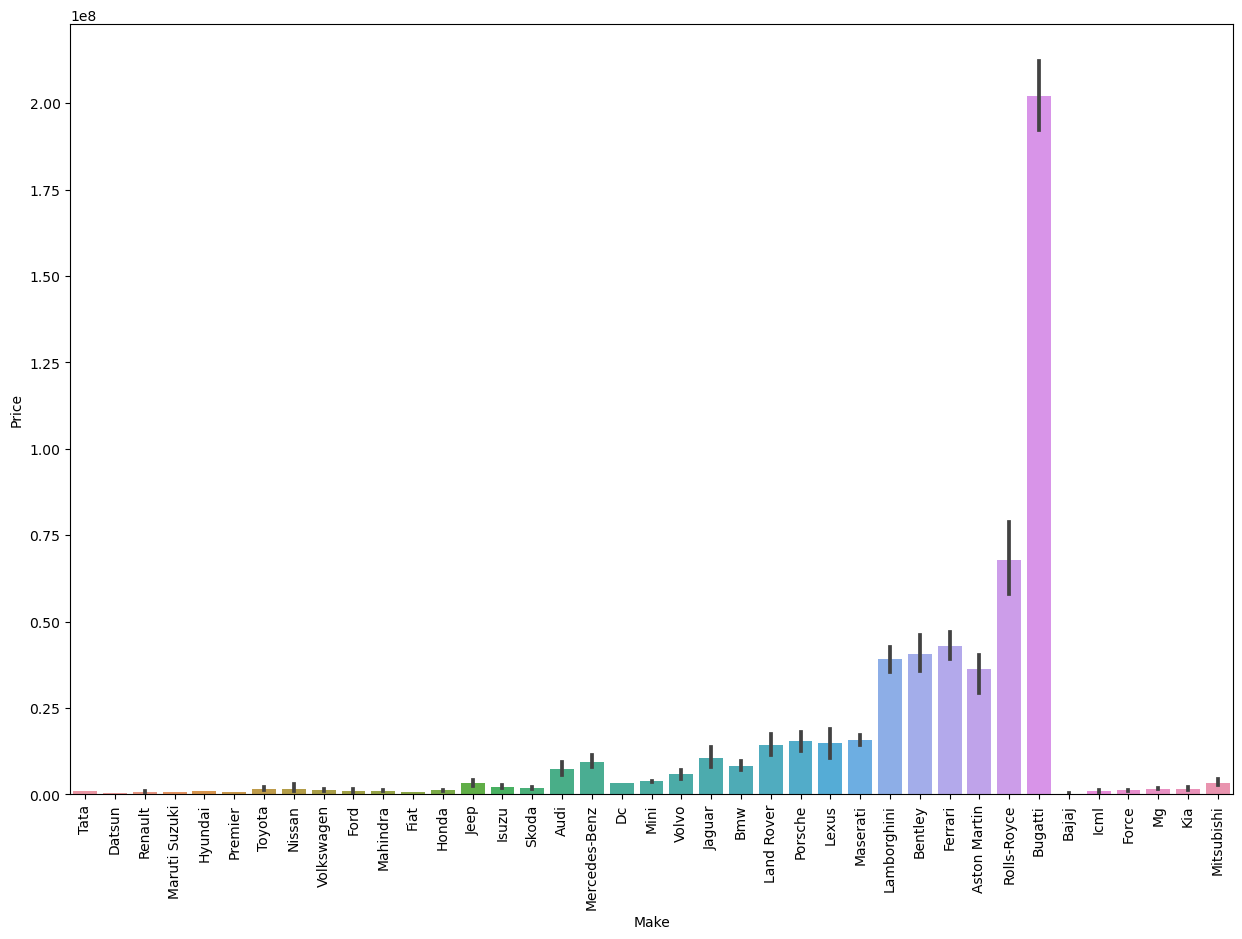

In [116]:
plt.figure(figsize=(15,10))
sns.barplot(x="Make",y="Price",data=df1)
plt.xticks(rotation=90);

- Top 3 cars in it is
1. bugatti 
2. Royal- royce
3. Frarie

## Find the details of top 3 expensive company's car

In [117]:
df1[((df["Make"]=="Bugatti")|(df["Make"]=="Rolls-Royce")|(df["Make"]=="Ferrari"))]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
344,8.0,2.0,2.0,4.0,Ferrari,Portofino,V8 Convertible,35000000.0,3855.0,AWD (All Wheel Drive),BS IV,Smart Key,560.0,755.0,Digital,Analog,Analog,Yes,Petrol,9.00,Double wishbone suspension,Multilink,119.000000,240.0000,CD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,not_defined,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
348,8.0,2.0,2.0,5.0,Ferrari,458 Speciale,Coupe,42531500.0,4497.0,AWD (All Wheel Drive),BS IV,Smart Key,605.0,540.0,Digital,Analog,Analog,Yes,Petrol,9.00,Twin wishbones,multi-link set-up,113.000000,230.0000,DVD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment,Yes,not_defined,not_defined,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
355,16.0,2.0,2.0,6.0,Bugatti,Chiron,W16,192142937.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1479.0,1600.0,Digital,Digital,Digital,Yes,Petrol,5.95,MacPherson Strut,Torsion Beam,179.608916,387.5852,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not_defined,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
356,16.0,2.0,2.0,6.0,Bugatti,Chiron,Sport,212155397.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1600.0,1479.0,Digital,Digital,Digital,Yes,Petrol,5.95,Runflat,Runflat,179.608916,387.5852,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not_defined,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
872,8.0,2.0,2.0,4.0,Ferrari,488 Gtb,Std,36761413.0,3902.0,AWD (All Wheel Drive),BS IV,Smart Key,670.0,760.0,Digital,Digital,Analog,Yes,Petrol,5.50,Double wishbone front axle,suspension with stabilizer bar,179.608916,230.0000,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not_defined,not_defined,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
873,8.0,2.0,2.0,4.0,Ferrari,488 Gtb,Spider,39319552.0,3902.0,AWD (All Wheel Drive),BS IV,Smart Key,670.0,760.0,Digital,Digital,Analog,Yes,Petrol,5.50,Double wishbone front axle,suspension with stabilizer bar,179.608916,230.0000,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not_defined,not_defined,Yes,Yes,not_defined,Yes,Yes,Yes,Yes
874,8.0,2.0,4.0,4.0,Ferrari,Gtc4 Lusso,V8 T,42000000.0,3900.0,RWD (Rear Wheel Drive),BS IV,Smart Key,610.0,760.0,Digital,Digital,Analog,Yes,Petrol,5.50,Double wishbone front axle,suspension with stabilizer bar,179.608916,450.0000,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,not_defined,Yes,Yes,Yes,Yes,

## Now find the cause why bugatti , rolls-royce, and ferrari company cars are expensive what features they have provided so we compare these on the basis of some premium features based on domain knowledge 

- Cylinder
- Power
- Torque
- Displacement

In [118]:
grp=df1.groupby(["Make"])["Cylinders","Displacement","Torque","Power"]

C:\Users\ritik\AppData\Local\Temp\ipykernel_19852\1933934149.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp=df1.groupby(["Make"])["Cylinders","Displacement","Torque","Power"]


In [119]:
grp.get_group("Bugatti")

,Cylinders,Displacement,Torque,Power
355,16.0,7993.0,1600.0,1479.0
356,16.0,7993.0,1479.0,1600.0


In [120]:
grp.get_group("Ferrari")

,Cylinders,Displacement,Torque,Power
344,8.0,3855.0,755.0,560.0
348,8.0,4497.0,540.0,605.0
872,8.0,3902.0,760.0,670.0
873,8.0,3902.0,760.0,670.0
874,8.0,3900.0,760.0,610.0
875,8.0,6262.0,697.0,681.0
1058,12.0,6496.0,718.0,789.0
1172,8.0,3902.0,760.0,669.0


In [121]:
grp.get_group("Rolls-Royce")

,Cylinders,Displacement,Torque,Power
349,12.0,6593.0,780.0,563.0
350,12.0,6592.0,780.0,570.0
351,12.0,6592.0,800.0,625.0
353,12.0,6750.0,850.0,563.0
354,12.0,6749.0,720.0,460.0
879,12.0,6598.0,780.0,571.0
880,12.0,6749.0,720.0,453.0
1219,12.0,6749.0,720.0,460.0
1220,12.0,6749.0,720.0,460.0


## Insights
- Cylinder found to be a distinges feature on the bases of we can clearly say that bugatti is expancive than frarrie and rolls-royce as displacement and torque
- But we can't say that other hand power is the cause for cars with repect to its price

## A buyer can choose cars based on following factors :
1. Safety
2. Power
3. Torque
4. Seating_Capacity
5. Mileage
6. Fuel Type

## 1. safety : No of air bags

In [122]:
df1.groupby(["Make"])["Number_of_Airbags"].agg(["min","max","mean"]).sort_values(by="mean",ascending=True)

,min,max,mean
Make,,,
Maruti Suzuki,1.0,2.0,1.815951
Renault,1.0,4.0,1.888889
Fiat,1.0,2.0,1.913043
Premier,2.0,2.0,2.000000
Bajaj,2.0,2.0,2.000000
Datsun,2.0,2.0,2.000000
Dc,2.0,2.0,2.000000
Force,2.0,2.0,2.000000
Icml,2.0,2.0,2.000000


- Top 3 companys provide security
1. Land Rover	
2. Audi	
3. Lexus	

## Power

In [123]:
df1.groupby(["Make"])["Power"].agg(["min","max","mean"]).sort_values(by="mean",ascending=True)

,min,max,mean
Make,,,
Bajaj,12.0,13.0,12.500000
Datsun,54.0,78.0,67.333333
Premier,64.0,76.6,69.533333
Maruti Suzuki,34.7,104.0,77.935583
Renault,54.0,110.0,84.805556
Fiat,68.0,145.0,94.521739
Tata,38.0,156.0,98.900000
Hyundai,59.0,185.0,99.390769
Force,85.0,140.0,103.333333


## Torque

In [124]:
df1.groupby(["Make"])["Torque"].agg(["min","max","mean"]).sort_values(by="mean",ascending=True)

,min,max,mean
Make,,,
Bajaj,16.100000,18.9,17.500000
Datsun,72.000000,104.0,97.583333
Maruti Suzuki,59.000000,1130.0,134.417178
Premier,103.000000,183.0,140.833333
Renault,72.000000,245.0,151.666667
Honda,110.000000,300.0,167.046875
Hyundai,8.300000,1712.0,172.520000
Fiat,96.000000,212.0,192.000000
Ford,120.000000,515.0,194.418605


## Seating_Capacity

In [125]:
df1.groupby(["Make"])["Seating_Capacity"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False)

,min,max,mean
Make,,,
Icml,7.0,9.0,8.454545
Mitsubishi,7.0,7.0,7.000000
Mahindra,4.0,9.0,6.512605
Land Rover,4.0,7.0,6.135135
Isuzu,5.0,7.0,5.800000
Datsun,5.0,7.0,5.750000
Toyota,5.0,8.0,5.670732
Force,5.0,7.0,5.666667
Renault,5.0,8.0,5.666667


## According to the seating capacity 
1. Icml	:	8
2. Mitsubishi :	7
3. Mahindra	:	6


## Mileage

In [126]:
df1.groupby(["Make"])["ARAI_Certified_Mileage"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False)

,min,max,mean
Make,,,
Bajaj,18.667728,35.000000,26.833864
Mercedes-Benz,7.800000,142.000000,22.974865
Maruti Suzuki,11.900000,28.400000,22.318907
Honda,14.400000,27.400000,21.362500
Datsun,20.100000,25.170000,21.353333
Ford,10.910000,26.100000,21.044598
Renault,13.860000,25.170000,20.630000
Tata,14.000000,27.280000,20.234636
Nissan,9.000000,23.080000,19.232759


## Fuel Type

In [127]:
grp=df1.groupby(["Make"])["Fuel_Type"]


In [128]:
for i in df1["Make"]:
    print(i,"---------------\n",grp.get_group(i).values)

Tata ---------------
 ['Petrol' 'Petrol' 'CNG' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol'
 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Diesel' 'Diesel'
 'Diesel' 'Diesel' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol'
 'Petrol' 'Petrol' 'Petrol' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel'
 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Diesel'
 'Petrol' 'Petrol' 'Petrol' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel'
 'Diesel' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol'
 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Diesel' 'Diesel' 'Diesel'
 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel'
 'Diesel' 'Electric' 'Electric' 'Electric' 'Diesel' 'Diesel' 'Diesel'
 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel'
 'Electric' 'Electric' 'Electric' 'Diesel' 'Diesel' 'Diesel' 'Diesel'
 'Diesel' 'Diesel' 'Petrol' 'Diesel' 'Petrol' 'Diesel']
Tata ---------------
 ['Petrol' 'Petrol' 'CNG' 'Petrol'

 ['Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Petrol' 'Petrol' 'Diesel'
 'Diesel' 'Diesel' 'Petrol' 'Petrol' 'Diesel' 'Petrol' 'Diesel' 'Petrol'
 'Diesel' 'Petrol' 'Petrol' 'Petrol' 'Diesel' 'Diesel' 'Diesel' 'Diesel'
 'Diesel' 'Petrol' 'Petrol' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel'
 'Diesel' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Diesel' 'Diesel' 'Diesel'
 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Electric' 'Electric' 'Diesel'
 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel'
 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel'
 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Petrol' 'Diesel'
 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Petrol'
 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel'
 'Diesel' 'Diesel' 'Diesel' 'Electric' 'Electric' 'Electric' 'Diesel'
 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel'
 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Di

Mitsubishi ---------------
 ['Petrol' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel']
Mitsubishi ---------------
 ['Petrol' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel']
Mitsubishi ---------------
 ['Petrol' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel']
Mitsubishi ---------------
 ['Petrol' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel']
Mitsubishi ---------------
 ['Petrol' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Diesel']
Bentley ---------------
 ['Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol']
Bentley ---------------
 ['Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Petrol']
Honda ---------------
 ['Petrol' 'Petrol' 'Petrol' 'Petrol' 'Diesel' 'Diesel' 'Diesel' 'Petrol'
 'Petrol' 'Diesel' 'Diesel' 'Petrol' 'Diesel' 'Petrol' 'Diesel' 'Petrol'
 'Diesel' 'Diesel' 'Diesel' 'Diesel' 'Petrol' 'Petrol' 'Petrol' 'Diesel'
 'Petrol' 'Diesel' 'Petrol' 'Diesel' 'Petrol' 'Diesel' 'Petrol' 'Petrol'
 'Petrol' 'Petrol' 'Petrol' 'Petrol' 'Diesel' 'Diesel' 'Di

## Extra features

In [129]:
extra_features = ["Navigation_System","Second_Row_AC_Vents","ESP_(Electronic_Stability_Program)","Cooled_Glove_Box","Turbocharger","Rain_Sensing_Wipers","Automatic_Headlamps","Cruise_Control","Make","Price","EBA_(Electronic_Brake_Assist)","EBD_(Electronic_Brake-force_Distribution)","ABS_(Anti-lock_Braking_System)","Gear_Indicator","Auto-Dimming_Rear-View_Mirror","Hill_Assist","Key_Off_Reminder","USB_Compatibility","Model"]
extra_features




['Navigation_System',
 'Second_Row_AC_Vents',
 'ESP_(Electronic_Stability_Program)',
 'Cooled_Glove_Box',
 'Turbocharger',
 'Rain_Sensing_Wipers',
 'Automatic_Headlamps',
 'Cruise_Control',
 'Make',
 'Price',
 'EBA_(Electronic_Brake_Assist)',
 'EBD_(Electronic_Brake-force_Distribution)',
 'ABS_(Anti-lock_Braking_System)',
 'Gear_Indicator',
 'Auto-Dimming_Rear-View_Mirror',
 'Hill_Assist',
 'Key_Off_Reminder',
 'USB_Compatibility',
 'Model']

In [130]:
df2=df1[extra_features]
df2

,Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,Cruise_Control,Make,Price,EBA_(Electronic_Brake_Assist),EBD_(Electronic_Brake-force_Distribution),ABS_(Anti-lock_Braking_System),Gear_Indicator,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Key_Off_Reminder,USB_Compatibility,Model
0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,292667.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Nano Genx
1,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,236447.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Nano Genx
2,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,296661.0,not_defined,not_defined,not_defined,not_defined,Yes,Yes,not_defined,not_defined,Nano Genx
3,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,334768.0,not_defined,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,Nano Genx
4,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,272223.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Nano Genx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Yes,Yes,not_defined,not_defined,Yes,not_defined,not_defined,Yes,Honda,1302000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City
1272,Yes,Yes,not_defined,Yes,Yes,Yes,Yes,Yes,Honda,1421000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City
1273,Yes,Yes,not_defined,not_defined,not_defined,not_defined,Yes,Yes,Honda,1431000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City
1274,Yes,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,Yes,Honda,1201000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes,City


In [131]:
df3=df2.copy()
df3.set_index("Model",inplace=True)
df3

,Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,Cruise_Control,Make,Price,EBA_(Electronic_Brake_Assist),EBD_(Electronic_Brake-force_Distribution),ABS_(Anti-lock_Braking_System),Gear_Indicator,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Key_Off_Reminder,USB_Compatibility
Model,,,,,,,,,,,,,,,,,,
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,292667.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,236447.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,296661.0,not_defined,not_defined,not_defined,not_defined,Yes,Yes,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,334768.0,not_defined,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined
Nano Genx,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Tata,272223.0,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City,Yes,Yes,not_defined,not_defined,Yes,not_defined,not_defined,Yes,Honda,1302000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes
City,Yes,Yes,not_defined,Yes,Yes,Yes,Yes,Yes,Honda,1421000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes
City,Yes,Yes,not_defined,not_defined,not_defined,not_defined,Yes,Yes,Honda,1431000.0,not_defined,Yes,Yes,not_defined,Yes,not_defined,Yes,Yes


In [132]:
df3.index

Index(['Nano Genx', 'Nano Genx', 'Nano Genx', 'Nano Genx', 'Nano Genx',
       'Nano Genx', 'Redi-Go', 'Redi-Go', 'Redi-Go', 'Redi-Go',
       ...
       'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City',
       'Montero'],
      dtype='object', name='Model', length=1276)

In [133]:
df3.values


array([['not_defined', 'not_defined', 'not_defined', ..., 'not_defined',
        'not_defined', 'not_defined'],
       ['not_defined', 'not_defined', 'not_defined', ..., 'not_defined',
        'not_defined', 'not_defined'],
       ['not_defined', 'not_defined', 'not_defined', ..., 'Yes',
        'not_defined', 'not_defined'],
       ...,
       ['Yes', 'Yes', 'not_defined', ..., 'not_defined', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'not_defined', ..., 'not_defined', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes']], dtype=object)

In [134]:
for i,j in zip(df3.index,df3.values):
    print(i,"----------------",j)

Nano Genx ---------------- ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 292667.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined']
Nano Genx ---------------- ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 236447.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined']
Nano Genx ---------------- ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 296661.0 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Yes' 'Yes' 'not_defined'
 'not_defined']
Nano Genx ---------------- ['not_defined' 'not_defined' 'not_defined' 'not_defined' 'not_defined'
 'not_defined' 'not_defined' 'not_defined' 'Tata' 334768.0 'not_defined'
 'not_defined' 'not_defined' 

Levante ---------------- ['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Maserati' 14512054.0
 'Yes' 'Yes' 'Yes' 'Yes' 'not_defined' 'Yes' 'Yes' 'Yes']
Levante ---------------- ['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Maserati' 14863774.0
 'Yes' 'Yes' 'Yes' 'Yes' 'not_defined' 'Yes' 'Yes' 'Yes']
Levante ---------------- ['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Maserati' 15383399.0
 'Yes' 'Yes' 'Yes' 'Yes' 'not_defined' 'Yes' 'Yes' 'Yes']
Mercedes-Benz G-Class ---------------- ['Yes' 'Yes' 'Yes' 'Yes' 'not_defined' 'Yes' 'Yes' 'Yes' 'Mercedes-Benz'
 21875136.0 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes']
Mercedes-Benz G-Class ---------------- ['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Mercedes-Benz'
 15000000.0 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes']
A8 L ---------------- ['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'not_defined' 'Yes' 'Audi' 15600000.0
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes']
Granturismo ---------------- ['Yes' 'Yes' 'Yes' 'Yes'

In [135]:
for i,j in zip(df3.index,df3.values):
    c=0
    l=[]
    for k in j:
        if type(k)==str:
            if k=="Yes":
                c=c+1
                l.append(k)
    print(i,c,j[9]) ## or j[len(j)-9]

Nano Genx 0 292667.0
Nano Genx 0 236447.0
Nano Genx 2 296661.0
Nano Genx 1 334768.0
Nano Genx 0 272223.0
Nano Genx 1 314815.0
Redi-Go 1 279650.0
Redi-Go 1 351832.0
Redi-Go 0 333419.0
Redi-Go 0 362000.0
Redi-Go 0 390000.0
Redi-Go 1 437065.0
Kwid 4 353290.0
Kwid 4 283290.0
Kwid 5 383290.0
Kwid 6 413290.0
Kwid 5 433290.0
Kwid 5 454490.0
Kwid 8 463290.0
Kwid 7 484490.0
Kwid 5 440990.0
Kwid 5 470990.0
Kwid 5 462190.0
Kwid 7 492190.0
Eeco 3 352136.0
Eeco 3 380573.0
Eeco 1 392967.0
Eeco 3 466057.0
Eeco 3 425255.0
Alto K10 3 377588.0
Alto K10 5 394036.0
Alto K10 3 360843.0
Alto K10 3 407238.0
Alto K10 1 439777.0
Alto K10 4 438559.0
Go 5 374990.0
Go 7 468229.0
Go 7 502492.0
Go 5 499990.0
Go 5 469990.0
Go 7 528464.0
Go 7 553015.0
Go 7 594464.0
Go 7 618015.0
Celerio Tour 3 422444.0
Celerio Tour 2 480670.0
Santro 5 429990.0
Santro 5 503990.0
Santro 6 547990.0
Santro 6 530990.0
Santro 7 512990.0
Santro 8 578990.0
Santro 7 570990.0
Santro 7 556490.0
Tiago 6 460000.0
Tiago 9 520000.0
Tiago 9 570000.0

Ertiga 8 936000.0
Ertiga 9 971000.0
Ertiga 5 834000.0
Ertiga 11 1013000.0
Ertiga 9 986689.0
Ertiga 9 1069689.0
Ertiga 10 1120689.0
Ertiga 5 887689.0
Baleno Rs 8 788913.0
Wr-V 9 1035000.0
Wr-V 8 925000.0
Wr-V 8 925000.0
Wr-V 7 815000.0
Wr-V 8 916050.0
Wr-V 7 808050.0
Wr-V 8 1048050.0
Wr-V 7 935050.0
Wr-V 10 995000.0
Tuv300 4 854328.0
Tuv300 5 914328.0
Tuv300 5 976592.0
Tuv300 6 999614.0
Tuv300 6 1031943.0
Tuv300 6 1022930.0
Tuv300 6 1055259.0
S-Cross 4 880689.0
S-Cross 6 992689.0
S-Cross 7 1043689.0
S-Cross 9 1143689.0
Captur 8 949999.0
Captur 9 1049999.0
Captur 15 1299999.0
Captur 12 1199999.0
Xylo 2 963037.0
Xylo 1 1004487.0
Xylo 1 1031951.0
Xylo 2 1066139.0
Xylo 3 1228335.0
Seltos 6 989000.0
Seltos 6 1029000.0
Seltos 11 1149000.0
Seltos 12 1309000.0
Seltos 16 1409000.0
Seltos 6 1034000.0
Seltos 6 1154000.0
Seltos 10 1254000.0
Seltos 11 1354000.0
Seltos 13 1534000.0
Seltos 16 1634000.0
Seltos 12 1379000.0
Seltos 16 1529000.0
Seltos 16 1629000.0
Seltos 16 1629000.0
Seltos 13 1414000.0


- As we can se that the feature increaces then price increase but in sort of linear (beacuse of sum other fectors)

## Data Preparation

In [136]:
df1.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
2,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,18.667728,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
3,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xta,334768.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,21.900000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,94.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not_defined,not_defined,Yes,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined
4,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xm,272223.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,Manual Adjustment,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined,not_defined


In [137]:
df1.shape

(1276, 49)

In [138]:
df.dtypes

Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                             object
Displacement                                  object
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                            object
Fuel_Type                                     object
Height                                        object
Length                                        object
Width                                         object
Body_Type                                     object
Doors                                        f

In [139]:
len(df1.select_dtypes(include="object").columns)

38

In [140]:
for i in df1.columns:
    print(i,"--------------",df1[i].unique())

Cylinders -------------- [ 2.  3.  4.  5.  6.  8. 12. 10. 16.]
Doors -------------- [5. 4. 2. 3.]
Seating_Capacity -------------- [ 4.  5.  7.  2.  6.  9.  8. 16.]
Number_of_Airbags -------------- [ 2.  1.  4.  6.  9.  8.  7. 10.  5.  3. 14.]
Make -------------- ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi']
Model -------------- ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Com

In [141]:
df1.columns

Index(['Cylinders', 'Doors', 'Seating_Capacity', 'Number_of_Airbags', 'Make',
       'Model', 'Variant', 'Price', 'Displacement', 'Drivetrain',
       'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque', 'Odometer',
       'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Au

In [142]:
df1.drop(columns=["Make","Tachometer","Tripmeter","Front_Suspension","Rear_Suspension","Audiosystem","Third_Row_AC_Vents","Ventilation_System","Gear_Shift_Reminder","Adjustable_Steering_Column","Key_Off_Reminder","Seat_Height_Adjustment","Rear_Center_Armrest","Cooled_Glove_Box","Rain_Sensing_Wipers"],inplace=True)


In [143]:
df1.shape

(1276, 34)

## Encoding

- Do label encoding for all object type coloumns except model and variant 
- Now first we do label encoding of those columns which has two unique values as yes or not-defined values

In [144]:
l = ['Navigation_System', 'Second_Row_AC_Vents',
       'ESP_(Electronic_Stability_Program)',
       'Turbocharger','Automatic_Headlamps',
       'Cruise_Control','EBA_(Electronic_Brake_Assist)',
       'EBD_(Electronic_Brake-force_Distribution)',
       'ABS_(Anti-lock_Braking_System)','Gear_Indicator',
       'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'USB_Compatibility',"ASR_/_Traction_Control"]
for i in l:
    df1[i].replace({"Yes":1,"not_defined":0},inplace=True)
df1.head(3)


,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Fuel_Type,ARAI_Certified_Mileage,Ground_Clearance,Boot_Space,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Petrol,23.600000,180.0,110.0,0,0,0,0,0,not_defined,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,Petrol,23.600000,180.0,110.0,0,0,0,0,0,not_defined,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not_defined,38.0,51.0,Digital,Analog,CNG,18.667728,180.0,110.0,1,1,0,0,0,not_defined,0,0,0,0,0,0,0,0,0


## Drivetrain

In [145]:
df1["Drivetrain"].unique()

array(['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)',
       'AWD (All Wheel Drive)', '4WD'], dtype=object)

In [146]:
df1["Drivetrain"]=df1["Drivetrain"].replace({'RWD (Rear Wheel Drive)':0,'FWD (Front Wheel Drive)':1,'AWD (All Wheel Drive)':2,'4WD':3})

In [147]:
df1["Drivetrain"].unique()

array([0, 1, 2, 3], dtype=int64)

In [148]:
df1["Emission_Norm"].unique()

array(['BS IV', 'BS 6', 'BS III', 'BS VI'], dtype=object)

In [149]:
df1["Emission_Norm"]=df1["Emission_Norm"].replace('BS 6','BS VI')

In [150]:
df1["Emission_Norm"]=df1["Emission_Norm"].replace({"BS IV":1,"BS III":0,"BS VI":2})

In [151]:
df1["Emission_Norm"].unique()

array([1, 2, 0], dtype=int64)

In [152]:
df1["Keyless_Entry"].unique()

array(['Remote', 'not_defined', 'Yes', 'Smart Key', 'Remote, Smart Key',
       'Smart Key, Remote'], dtype=object)

In [153]:
df1["Keyless_Entry"]=df1["Keyless_Entry"].replace('Remote, Smart Key','Smart Key, Remote')

In [154]:
df1["Keyless_Entry"]=df1["Keyless_Entry"].replace({'not_defined':0,'Remote':1,'Yes':2,'Smart Key':3,'Smart Key, Remote':4})

In [155]:
df1["Keyless_Entry"].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [156]:
df1["Odometer"].unique()

array(['Digital', 'Analog', 'not_defined', 'Digital, Analog', 'Yes'],
      dtype=object)

In [157]:
df1["Odometer"]=df1["Odometer"].replace({'Digital':1,'not_defined':0,'Analog':2,'Digital, Analog':3,'Yes':4})

In [158]:
df1["Odometer"].unique()

array([1, 2, 0, 3, 4], dtype=int64)

In [159]:
df1["Speedometer"].unique()

array(['Analog', 'Digital', 'Analog, Digital', 'Digital, Analog',
       'not_defined', 'Yes'], dtype=object)

In [160]:
df1["Speedometer"]=df1["Speedometer"].replace('Digital, Analog','Analog, Digital')

In [161]:
df1["Speedometer"]=df1["Speedometer"].replace({'Analog':0,'Digital':1,'Analog, Digital':2,'not_defined':3,'Yes':4})

In [162]:
df1["Speedometer"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [163]:
df1["Fuel_Type"].unique()

array(['Petrol', 'CNG', 'Diesel', 'CNG + Petrol', 'Hybrid', 'Electric'],
      dtype=object)

In [164]:
df1["Fuel_Type"]=df1["Fuel_Type"].replace({'Petrol':0,'CNG':1,'Diesel':2,'CNG + Petrol':3,'Hybrid':4, 'Electric':5})

In [165]:
df1["Fuel_Type"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [166]:
df1["Parking_Assistance"].unique()

array(['not_defined', 'Rear sensors', 'Rear sensors with camera',
       'Front and rear sensors with camera',
       'Rear sensors, Rear sensors with camera',
       'Rear sensors with camera, Rear sensors', 'Yes',
       'Front & rear sensors with 360 degree view',
       'Front sensors, Rear sensors', 'Rear sensors, Front sensors',
       'Front and rear sensors with camera, Front & rear sensors with 360 degree view'],
      dtype=object)

In [167]:
df1["Parking_Assistance"]=df1["Parking_Assistance"].replace({"Rear sensors, Rear sensors with camera":"Rear sensors with camera","Rear sensors with camera, Rear sensors":"Rear sensors with camera","Front sensors, Rear sensors":"Rear sensors, Front sensors","Front and rear sensors with camera, Front & rear sensors with 360 degree view":"Front & rear sensors with 360 degree view"})

In [168]:
df1["Parking_Assistance"]=df1["Parking_Assistance"].replace({"not_defined":0,"Rear sensors":1,"Rear sensors with camera":2,"Front and rear sensors with camera":3,"Yes":4,"Front & rear sensors with 360 degree view":5,"Rear sensors, Front sensors":6})

In [169]:
df1["Parking_Assistance"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

## Apply mean target encoding on model and variant

In [170]:
df2=df1.groupby(["Model"])["Price"].agg(["mean"]).reset_index()
df2


,Model,mean
0,3-Series,4.540000e+06
1,458 Speciale,4.253150e+07
2,458 Spider,4.336750e+07
3,488 Gtb,3.804048e+07
4,5-Series,6.196667e+06
5,6-Series,6.805000e+06
6,7-Series,1.554333e+07
7,718,8.795000e+06
8,812 Superfast,5.200000e+07
9,911,1.813200e+07


In [171]:
l=[]
for i in df1["Model"]:
    for j,k in df2.iterrows():
        if i==k["Model"]:
            l.append(k["mean"])




In [172]:
l

[291263.5,
 291263.5,
 291263.5,
 291263.5,
 291263.5,
 291263.5,
 358994.3333333333,
 358994.3333333333,
 358994.3333333333,
 358994.3333333333,
 358994.3333333333,
 358994.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 427923.3333333333,
 403397.6,
 403397.6,
 403397.6,
 403397.6,
 403397.6,
 403006.8333333333,
 403006.8333333333,
 403006.8333333333,
 403006.8333333333,
 403006.8333333333,
 403006.8333333333,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 512183.22222222225,
 451557.0,
 451557.0,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 529052.5,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 586000.0,
 516714.125,

In [173]:
df1["Model"]=l
df1.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Fuel_Type,ARAI_Certified_Mileage,Ground_Clearance,Boot_Space,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,291263.5,Xt,292667.0,624.0,0,1,1,38.0,51.0,1,0,0,23.600000,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,291263.5,Xe,236447.0,624.0,0,1,0,38.0,51.0,1,0,0,23.600000,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,291263.5,Emax Xm,296661.0,624.0,0,1,0,38.0,51.0,1,0,1,18.667728,180.0,110.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,5.0,4.0,2.0,291263.5,Xta,334768.0,624.0,0,1,1,38.0,51.0,1,0,0,21.900000,180.0,94.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,5.0,4.0,2.0,291263.5,Xm,272223.0,624.0,0,1,0,38.0,51.0,1,0,0,23.600000,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [174]:
df2=df1.groupby(["Variant"])["Price"].agg(["mean"]).reset_index()
df2


,Variant,mean
0,1.0 S,3.900000e+05
1,1.0 S Amt,4.370650e+05
2,1.0 Turbo Gdi Dct S,9.400000e+05
3,1.0 Turbo Gdi Dct Sx Plus,1.115500e+06
4,1.0 Turbo Gdi Mt S,8.260000e+05
...,...,...
1059,Zxi Amt,6.338675e+05
1060,Zxi Amt (O),5.523500e+05
1061,Zxi At,8.960565e+05
1062,Zxi Plus,8.502043e+05


In [175]:
l=[]
for i in df1["Variant"]:
    for j,k in df2.iterrows():
        if i==k["Variant"]:
            l.append(k["mean"])

In [176]:
df1["Variant"]=l
df1.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Fuel_Type,ARAI_Certified_Mileage,Ground_Clearance,Boot_Space,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,291263.5,292667.0,292667.0,624.0,0,1,1,38.0,51.0,1,0,0,23.600000,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,291263.5,465723.5,236447.0,624.0,0,1,0,38.0,51.0,1,0,0,23.600000,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,291263.5,296661.0,296661.0,624.0,0,1,0,38.0,51.0,1,0,1,18.667728,180.0,110.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,5.0,4.0,2.0,291263.5,334768.0,334768.0,624.0,0,1,1,38.0,51.0,1,0,0,21.900000,180.0,94.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,5.0,4.0,2.0,291263.5,813741.0,272223.0,624.0,0,1,0,38.0,51.0,1,0,0,23.600000,180.0,110.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [177]:
df1.shape

(1276, 34)

## Seggregate X and Y

In [178]:
x=df1.drop(columns=["Price"])
y=df1["Price"]

In [179]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [180]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [181]:
lr=LinearRegression()

In [182]:
knn=KNeighborsRegressor()

- We use cross validation because in Mean traget in codeing the data get overfit in that situation
## Use cv to avoid overfitting situation/data leakage that happened due to mean target encoding

In [183]:
r2score=[]
Models=[lr,knn]
for i in Models:
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(i,x_scaled,y,scoring='r2',cv=cv,n_jobs=-1)
    r2=np.mean(scores)
    r2score.append(r2)
r2score 


[0.9828322656854404, 0.8586946214769314]

In [184]:
dtc=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb=XGBRegressor()
adb=AdaBoostRegressor()


In [185]:
Model=[dtc,rfr,gbr,xgb,adb]

In [186]:
for i in Model:
    cv=KFold(n_splits=5,random_state=1,shuffle=True)
    scores = cross_val_score(i,x,y,scoring='r2',cv=cv,n_jobs=-1)
    r=np.mean(scores)
    r2score.append(r)
r2score 

[0.9828322656854404,
 0.8586946214769314,
 0.9170440172308169,
 0.964477586507219,
 0.9763043781670577,
 0.9827126143045595,
 0.9334412175448996]

In [189]:
Model_names=["LinearRegression","KNN","Decisiontree","randomforest","gradientboost","xgboost","adaboost"]
Model_s_evaluation = pd.DataFrame({'Regressor Models': Model_names, 'r square': r2score})
Model_s_evaluation


,Regressor Models,r square
0,LinearRegression,0.982832
1,KNN,0.858695
2,Decisiontree,0.917044
3,randomforest,0.964478
4,gradientboost,0.976304
5,xgboost,0.982713
6,adaboost,0.933441


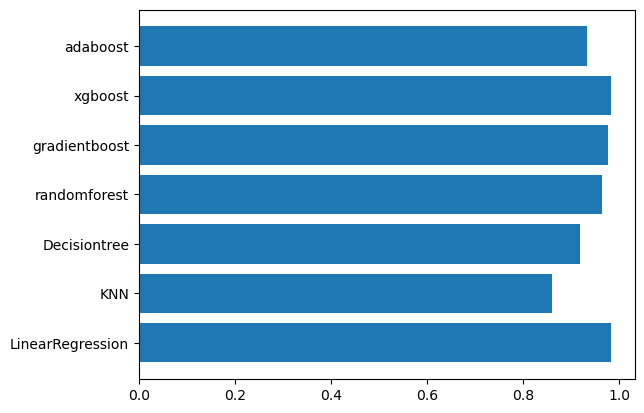

In [191]:
plt.barh(Model_s_evaluation["Regressor Models"],Model_s_evaluation["r square"]);